In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as stat
import webbrowser

%matplotlib inline
sns.set()

# To avoid Warning message inbetween ...
import warnings
warnings.filterwarnings('ignore')

In [2]:
company_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')
company = pd.read_csv('Company.csv')
company_value = pd.read_csv('CompanyValues.csv')

In [3]:
def quick_analysis(df):
    print("Data info:")
    print(df.info())
    print("-------------****----------------\n\nData Types:")
    print(df.dtypes)
    print("-------------****----------------\n\nRows and Columns:")
    print(df.shape)
    print("-------------****----------------\n\nColumn names:")
    print(df.columns)
    print("-------------****----------------\n\nNull Values:")
    print(df.apply(lambda x: sum(x.isnull()) / len(df)))
    print("-------------****----------------\n\nUnique values:")
    print(df.nunique())
    print("-------------****----------------\n\nDescribes:")
    print(df.describe())
    

In [4]:
def get_eda_features(df):
    #Visual Exploratory Data Analysis (EDA) And Your First Model
    #EDA on Feature Variables
    print(list(set(df.dtypes.tolist())))
    df_object = df.select_dtypes(include=["object"]).copy()
    df_int = df.select_dtypes(include=['int64']).copy()

    categorical = df_object.columns
    numerical = df_int.columns

    print("Datashape of Object Dataframe:",df_object.shape)
    print("Datashape of Interger Dataframe:",df_int.shape)
    return categorical, numerical

In [5]:
def univariate_analysis(df, categorical, row_num=1, col_num=2):
    fig,ax = plt.subplots(row_num,col_num, figsize=(20, 5*row_num))
    for variable,subplot in zip(categorical,ax.flatten()):
        sns.countplot(df[variable],ax=subplot)
        for label in subplot.get_xticklabels():
            label.set_rotation(20)

In [6]:
def univariate_analysis_on_numerial(df, numerical, row_num=1,col_num=2):
    df[numerical].hist(bins=50,figsize=(16 + (2*row_num),20),layout=(8, col_num))

In [7]:
def column_distplot(df, column_name, bins=50, describe=True):
    if describe:
        print(df[column_name].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[column_name], color='g', bins=bins, hist_kws={'alpha': 0.4});

Data Exploration

In [8]:
quick_analysis(company)
company.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ticker_symbol  6 non-null      object
 1   company_name   6 non-null      object
dtypes: object(2)
memory usage: 228.0+ bytes
None
-------------****----------------

Data Types:
ticker_symbol    object
company_name     object
dtype: object
-------------****----------------

Rows and Columns:
(6, 2)
-------------****----------------

Column names:
Index(['ticker_symbol', 'company_name'], dtype='object')
-------------****----------------

Null Values:
ticker_symbol    0.0
company_name     0.0
dtype: float64
-------------****----------------

Unique values:
ticker_symbol    6
company_name     5
dtype: int64
-------------****----------------

Describes:
       ticker_symbol company_name
count              6            6
unique             6            5
top             AAPL   Google Inc
freq

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc


In [9]:
company_categorial, company_numerical = get_eda_features(company)

[dtype('O')]
Datashape of Object Dataframe: (6, 2)
Datashape of Interger Dataframe: (6, 0)


In [10]:
company_categorial

Index(['ticker_symbol', 'company_name'], dtype='object')

In [11]:
company_numerical

Index([], dtype='object')

univariate_analysis(company, company_categorial, row_num=1, col_num=2)

In [12]:
quick_analysis(company_value)
company_value.head()

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17528 entries, 0 to 17527
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 958.7+ KB
None
-------------****----------------

Data Types:
ticker_symbol     object
day_date          object
close_value      float64
volume             int64
open_value       float64
high_value       float64
low_value        float64
dtype: object
-------------****----------------

Rows and Columns:
(17528, 7)
-------------****----------------

Column names:
Index(['ticker_symbol', 'day_date', 'close_value', 'volume', 'open_

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [13]:
company_value_categorial, company_value_numerical = get_eda_features(company_value)

[dtype('int64'), dtype('float64'), dtype('O')]
Datashape of Object Dataframe: (17528, 2)
Datashape of Interger Dataframe: (17528, 1)


In [14]:
company_value_categorial

Index(['ticker_symbol', 'day_date'], dtype='object')

In [15]:
company_value_categorial = company_value_categorial.drop("day_date")


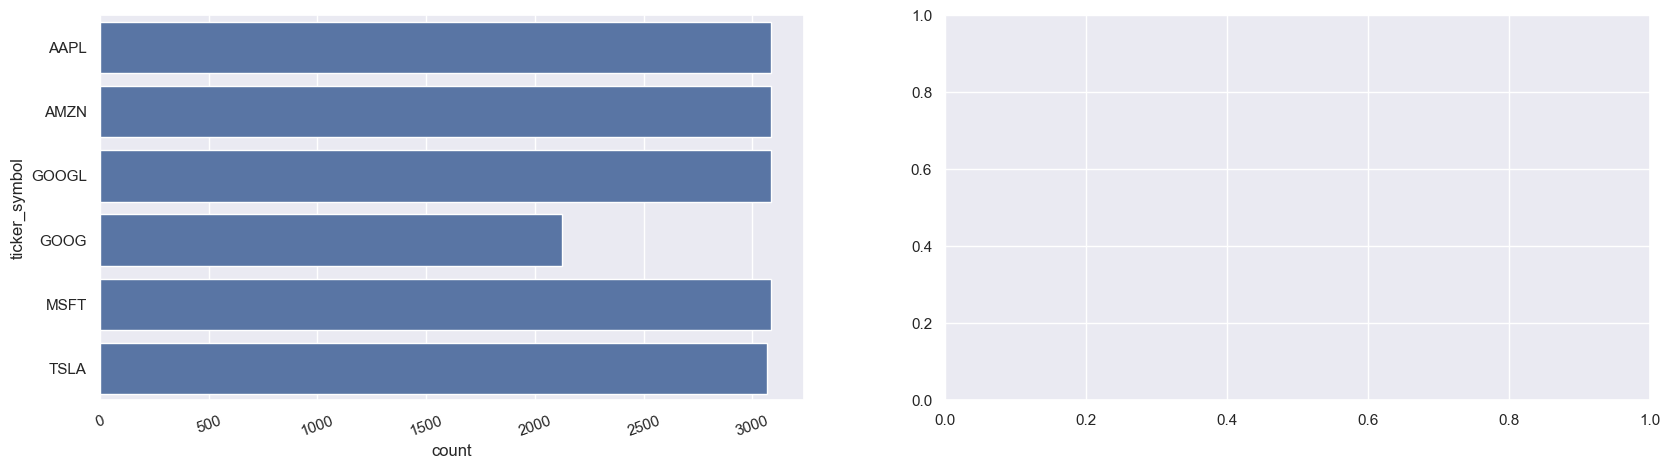

In [16]:
univariate_analysis(company_value, company_value_categorial, row_num=1, col_num=2)
plt.savefig("CompanyTweetCount.png")

In [17]:
company_value_numerical

Index(['volume'], dtype='object')

count    1.752800e+04
mean     2.025441e+07
std      3.322733e+07
min      7.932000e+03
25%      2.075086e+06
50%      4.835618e+06
75%      2.704358e+07
max      4.624423e+08
Name: volume, dtype: float64


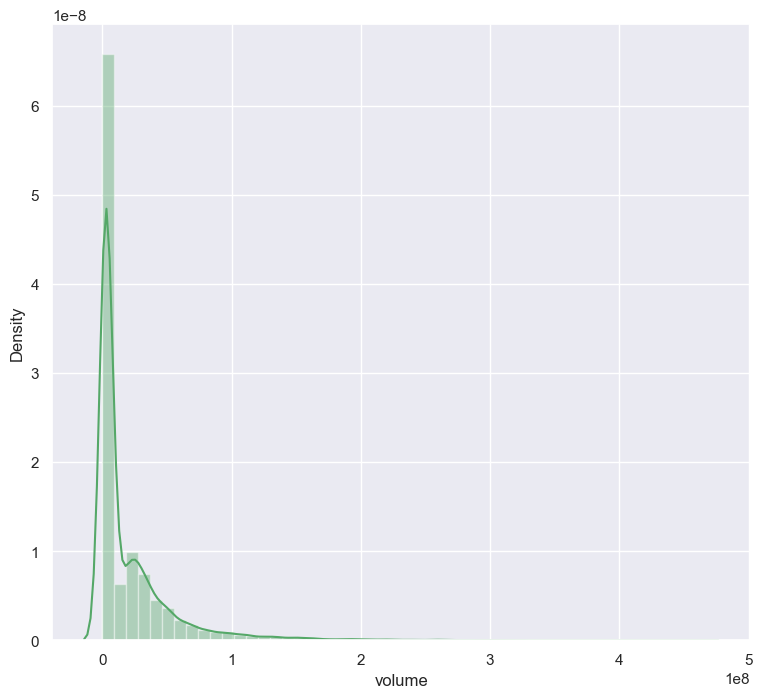

In [18]:
column_distplot(company_value, "volume")
plt.savefig("VolumevsDensity.png")

In [19]:
quick_analysis(tweet)
tweet.head()


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717964 entries, 0 to 3717963
Data columns (total 7 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   tweet_id     int64 
 1   writer       object
 2   post_date    int64 
 3   body         object
 4   comment_num  int64 
 5   retweet_num  int64 
 6   like_num     int64 
dtypes: int64(5), object(2)
memory usage: 198.6+ MB
None
-------------****----------------

Data Types:
tweet_id        int64
writer         object
post_date       int64
body           object
comment_num     int64
retweet_num     int64
like_num        int64
dtype: object
-------------****----------------

Rows and Columns:
(3717964, 7)
-------------****----------------

Column names:
Index(['tweet_id', 'writer', 'post_date', 'body', 'comment_num', 'retweet_num',
       'like_num'],
      dtype='object')
-------------****----------------

Null Values:
tweet_id       0.000000
writer         0.012715
post_date      0.000000
body           0.000000

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [20]:
tweet_categorial, tweet_numerical = get_eda_features(tweet)

[dtype('int64'), dtype('O')]
Datashape of Object Dataframe: (3717964, 2)
Datashape of Interger Dataframe: (3717964, 5)


In [21]:
tweet_categorial

Index(['writer', 'body'], dtype='object')

In [22]:
tweet['writer'].describe()

count     3670691
unique     140131
top       App_sw_
freq        91741
Name: writer, dtype: object

In [23]:
tweet['body'].str.split().str.len()

0          17
1          20
2          21
3          13
4          16
           ..
3717959    53
3717960    40
3717961    10
3717962     9
3717963    17
Name: body, Length: 3717964, dtype: int64

In [24]:
body_len = tweet['body'].str.split().str.len()
body_len.describe()

count    3.717964e+06
mean     1.758108e+01
std      9.618676e+00
min      1.000000e+00
25%      1.200000e+01
50%      1.500000e+01
75%      2.100000e+01
max      6.800000e+01
Name: body, dtype: float64

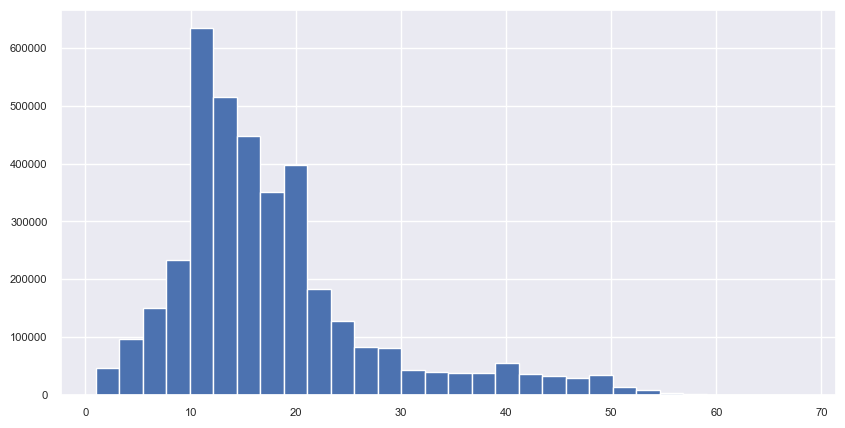

In [25]:
body_len.hist(figsize=(10, 5), bins=30, xlabelsize=8, ylabelsize=8)
plt.savefig("TweetDataHistogram.png")

In [26]:
tweet_numerical

Index(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

In [27]:
tweet_numerical = tweet_numerical.drop(['tweet_id'])

tweet_numerical

Index(['post_date', 'comment_num', 'retweet_num', 'like_num'], dtype='object')

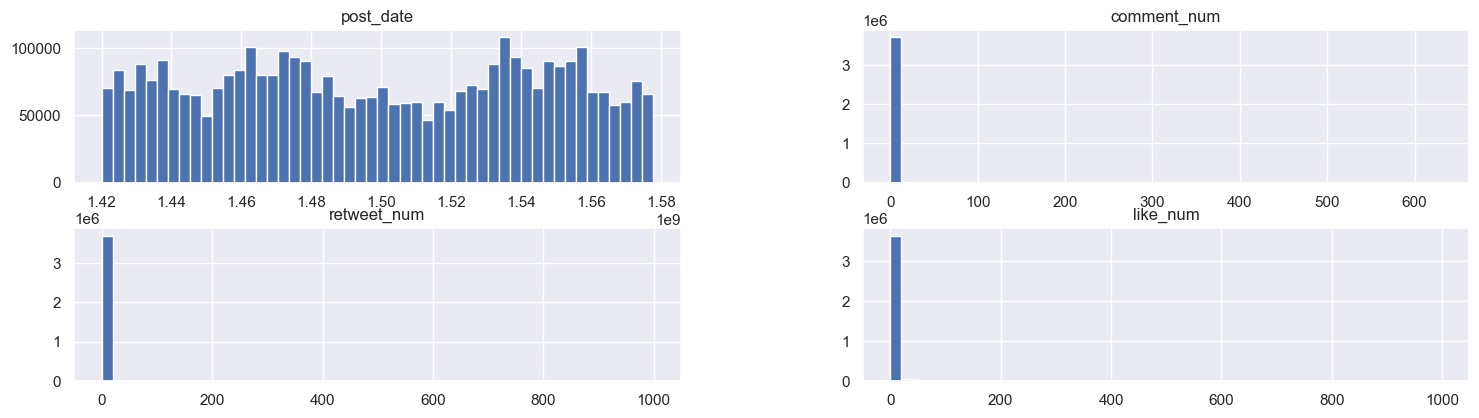

In [28]:
univariate_analysis_on_numerial(tweet, tweet_numerical)

Pre-Processing of Data

In [29]:
# preprocessing of data  
tweet_df = pd.merge(company_tweet , tweet , on="tweet_id", how= "inner")
tweet_df.head(5)

,tweet_id,ticker_symbol,writer,post_date,body,comment_num,retweet_num,like_num
0,550803612197457920,AAPL,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
1,550803612197457920,AMZN,SentiQuant,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1
2,550803610825928706,AAPL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
3,550803610825928706,GOOGL,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1
4,550803610825928706,AMZN,SentiQuant,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1


In [30]:
company_value.head(5)

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [31]:
tweet_df["total_engangement"] = tweet_df["comment_num"] + tweet_df["retweet_num"] + tweet_df["like_num"]

count    4.336445e+06
mean     3.030775e+00
std      1.901432e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.703000e+03
Name: total_engangement, dtype: float64


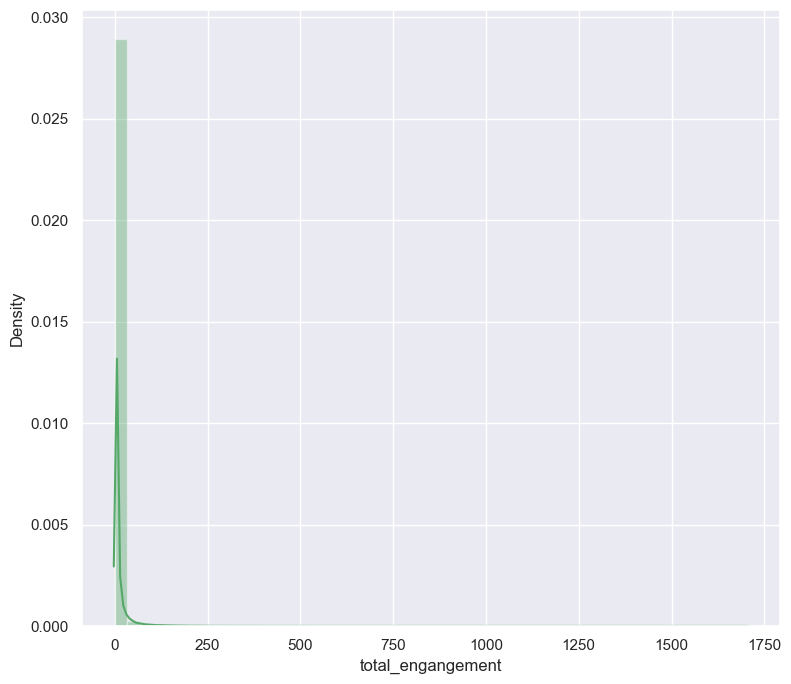

In [32]:
# histogram of total engagement on tweets and filter the low-impact tweet
column_distplot(tweet_df, column_name="total_engangement")
plt.savefig("TwitterEngagement.png")

In [33]:
engagement_threshold = 40

In [34]:
tweet_df = tweet_df[tweet_df["total_engangement"] > engagement_threshold]


In [35]:
tweet_df['post_date'] = pd.to_datetime(tweet_df['post_date'], unit='s')

In [36]:
tweet_df['day_date'] = pd.to_datetime(tweet_df['post_date'].apply(lambda date: date.date()))

In [37]:
tweet_df = tweet_df.sort_values(by="day_date")

In [38]:
# Company value dataset
stock_df = company_value

stock_df['day_date']  = pd.to_datetime(stock_df['day_date'])

stock_df.sample(5)


,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
6046,AMZN,2018-12-02,1690.17,5744168,1679.50,1696.00,1666.50
3373,AMZN,2019-04-08,1849.86,3745428,1833.23,1850.20,1825.11
13890,MSFT,2010-06-07,25.29,80327890,25.82,25.83,25.24
3119,AMZN,2020-04-09,2042.76,4655617,2044.30,2053.00,2017.66
5485,AMZN,2010-11-12,165.68,7158059,170.12,171.26,165.05


In [39]:
start_day = min(tweet_df['day_date'])
print(f"Start day: {start_day}")

end_day = max(tweet_df['day_date'])
print(f"End day: {end_day}")


Start day: 2015-01-01 00:00:00
End day: 2019-12-31 00:00:00


In [40]:
stock_df = stock_df[(stock_df['day_date'] >= start_day) & (stock_df['day_date'] <= end_day)]
stock_df = stock_df.sort_values(by="day_date")

In [41]:
# Data cleaning 
tweet_df = tweet_df.drop(['tweet_id', 'post_date', 'comment_num', 'retweet_num', 'like_num'], axis=1)

In [42]:
print(tweet_df.info())
print()
tweet_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 54440 entries, 40 to 4336399
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ticker_symbol      54440 non-null  object        
 1   writer             53902 non-null  object        
 2   body               54440 non-null  object        
 3   total_engangement  54440 non-null  int64         
 4   day_date           54440 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 2.5+ MB
None



,ticker_symbol,writer,body,total_engangement,day_date
3948546,TSLA,SteveHamel16,After 14K+ yesterday almost 8K more today!$TSL...,57,2018-10-26
3988565,TSLA,Trumpery45,The relationship destroyer $tsla,62,2018-12-19
4166217,TSLA,sammathews,Just put in an order for $TSLA at 190. @elonmu...,57,2019-05-29
4309114,TSLA,ChrisLeeterman,Update on the Tesla supercharger at the Madonn...,146,2019-12-01
194201,AAPL,CNNBusiness,One of these is not like the other. Can you te...,72,2015-05-18


In [43]:
print(stock_df.info())
print()
stock_df.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 10956 entries, 2517 to 103
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ticker_symbol  10956 non-null  object        
 1   day_date       10956 non-null  datetime64[ns]
 2   close_value    10956 non-null  float64       
 3   volume         10956 non-null  int64         
 4   open_value     10956 non-null  float64       
 5   high_value     10956 non-null  float64       
 6   low_value      10956 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 684.8+ KB
None



,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
279,AAPL,2019-04-22,204.53,17841920,202.83,204.94,202.34
9789,GOOG,2018-04-16,1037.98,1194144,1037.00,1043.24,1026.74
8813,GOOGL,2016-02-07,703.76,5470489,725.50,726.72,700.14
3894,AMZN,2017-03-13,854.59,1906941,851.77,855.69,851.71
3655,AMZN,2018-02-22,1485.34,4806267,1495.36,1502.54,1475.76


In [44]:
import nltk                             
# from nltk.corpus import twitter_samples                            
# from nltk.corpus import stopwords 
# from nltk.stem import PorterStemmer
# from nltk.tokenize import TweetTokenizer  

import random  
import re                     
import string

In [45]:
tweets = tweet_df["body"]
tweets

40         This is Wall Street's top pick in 2015. Hint: ...
47         See how tech companies like Apple, Twitter and...
242        Top Stock Analyst Releases Report on Top Stock...
243        Analyst Report on Top Stock Market Options for...
244        Analyst Report on Top Stock Market Options for...
                                 ...                        
4335656    Not some conspiracy theory, btw. @PlainSite pu...
4335644    Tesla China-Made Model 3 has reached over 1,50...
4335624    Repeat after me: $TSLA is the only company in ...
4335587    ‘Save Clips on Honk’ function records a flying...
4336399    $TSLA Interesting...$93M trade after hours!Whe...
Name: body, Length: 54440, dtype: object

In [46]:
def remove_special_character(tweet):
#     print(tweet)
    # remove the old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    # remove hashtags. only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)

    # remove single numeric terms in the tweet. 
    tweet = re.sub(r'[0-9]', '', tweet)
    
    return tweet

In [47]:
tweet_df["tweet"] = tweet_df["body"].apply(lambda tweet: remove_special_character(tweet))
tweet_df["tweet"] = tweet_df["tweet"].str.lower()
tweet_df[["body", "tweet"]].sample(10)

,body,tweet
84265,Apple sued by Ericsson over claim it infringed...,apple sued by ericsson over claim it infringed...
1279349,This chart shows FANG (plus Apple and Microsof...,this chart shows fang (plus apple and microsof...
3796580,Reminder for $TSLA bears: we haven't even had ...,reminder for $tsla bears: we haven't even had ...
3889171,"I will say it 1 more time, $nio is NOT China $...","i will say it more time, $nio is not china $t..."
3955176,"6\6 When you're shivering in the cold, pissing...","\ when you're shivering in the cold, pissing d..."
4242168,The depositions of Courtney McBean of Evercore...,the depositions of courtney mcbean of evercore...
3805139,Thanks for featuring me in @zerohedge article ...,thanks for featuring me in @zerohedge article ...
1861555,#AI #ML #BigData #cloud #blockchain #fintech h...,ai ml bigdata cloud blockchain fintech huge ga...
3583208,Tesla is likely to report next week the delive...,tesla is likely to report next week the delive...
3747277,Bulls and bears alike. This is Edmunds. All th...,bulls and bears alike. this is edmunds. all th...


Model Building

In [48]:
from afinn import Afinn
afinn = Afinn()

In [49]:
tweet_df['afinn_score'] = tweet_df['tweet'].apply(lambda tweet: afinn.score(tweet))
tweet_df['afinn_score'].sample(5)

1492367    0.0
3988121    0.0
3852999    4.0
3612241    0.0
4106145   -5.0
Name: afinn_score, dtype: float64

In [50]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vanderSentimentAnalyzer = SentimentIntensityAnalyzer()

In [51]:
def getVanderScore(tweet):    
    vs = vanderSentimentAnalyzer.polarity_scores(tweet)
    score = vs['compound']
    return score

def getVanderSentiment(score):    
    if (score >= 0.05): 
        return "Positive"
    
    elif (score < 0.05 and score > -0.05):
        return "Neutral"
    
    elif (score <= -0.05):    
        return "Negative"
    
    return score

In [52]:
tweet_df['vander_score'] = tweet_df['body'].apply(lambda tweet: getVanderScore(tweet))
tweet_df['vander_sentiment'] = tweet_df['vander_score'].apply(lambda score: getVanderSentiment(score))
tweet_df[['ticker_symbol', 'day_date', 'vander_score', 'vander_sentiment']].sample(10)


,ticker_symbol,day_date,vander_score,vander_sentiment
3900395,TSLA,2018-09-24,0.7266,Positive
4318042,TSLA,2019-12-12,-0.3400,Negative
3345514,MSFT,2019-03-14,0.5255,Positive
1120963,AAPL,2017-08-30,0.3818,Positive
4010416,TSLA,2019-01-17,-0.5242,Negative
4088730,TSLA,2019-03-28,-0.3878,Negative
4139499,TSLA,2019-05-04,0.6369,Positive
4231014,TSLA,2019-08-21,0.4588,Positive
3825095,TSLA,2018-08-07,0.3818,Positive
1542964,AAPL,2019-01-02,-0.8176,Negative


Data Analysis

Sentiment score of apple company


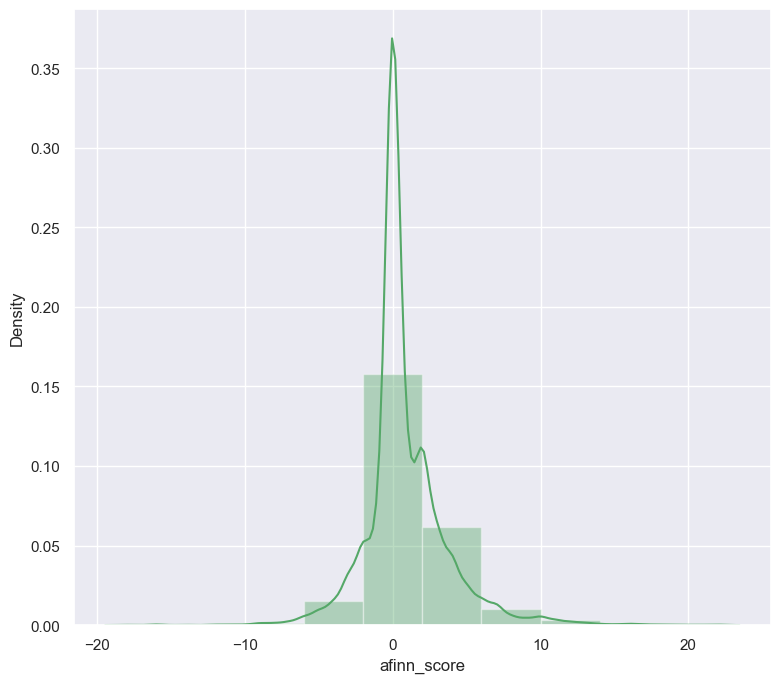

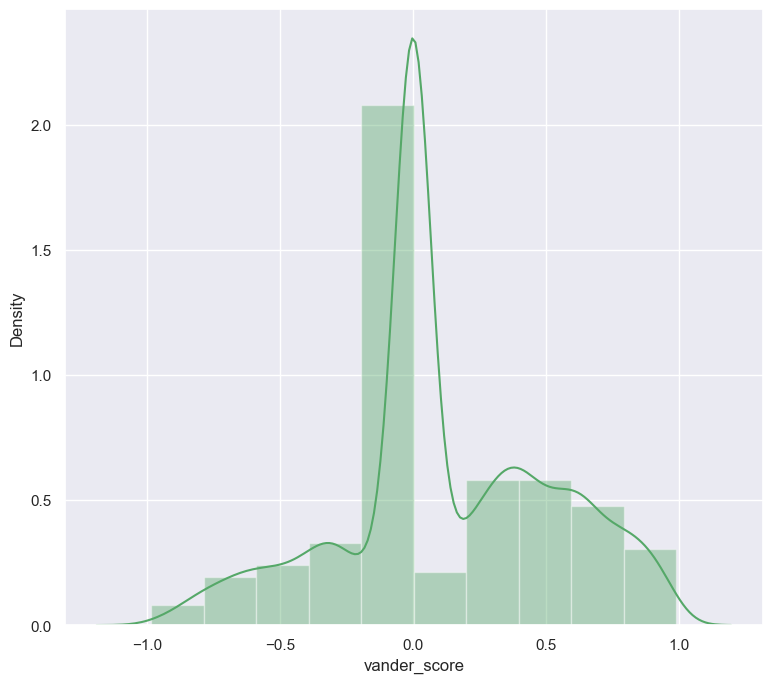



--------------


Sentiment score of Amazon.com company


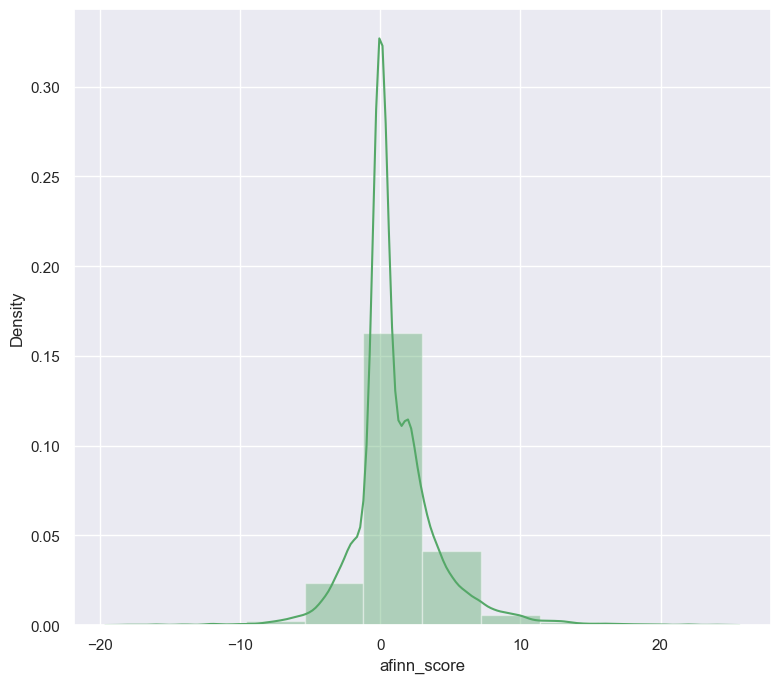

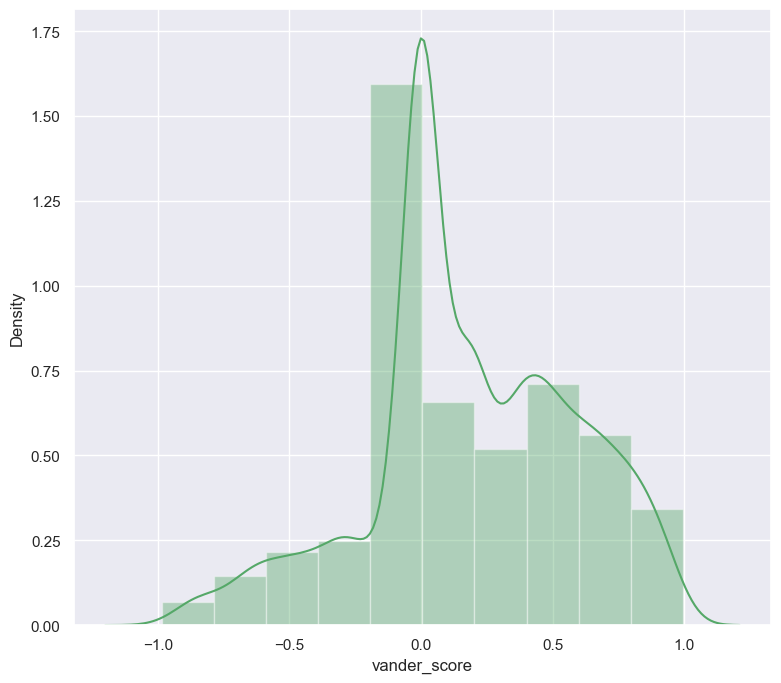



--------------


Sentiment score of Google Inc company


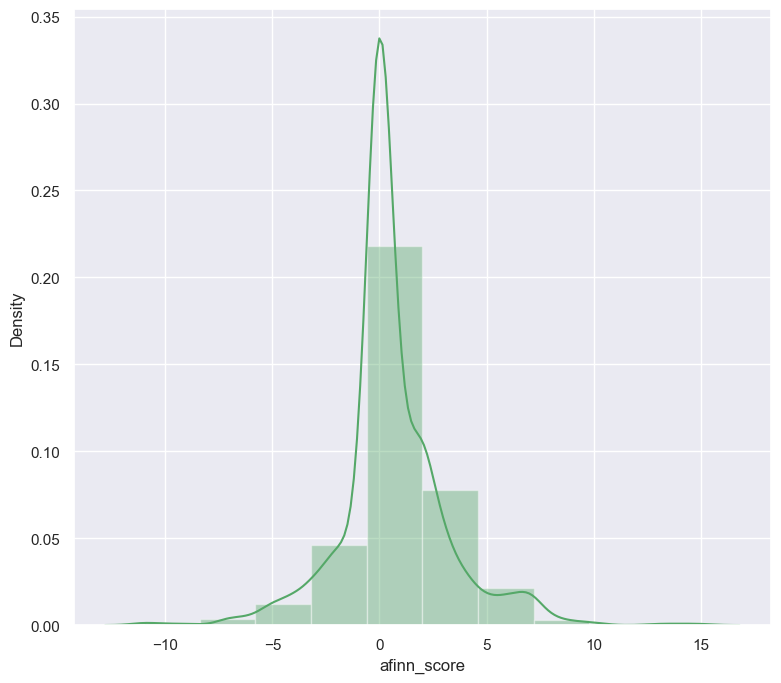

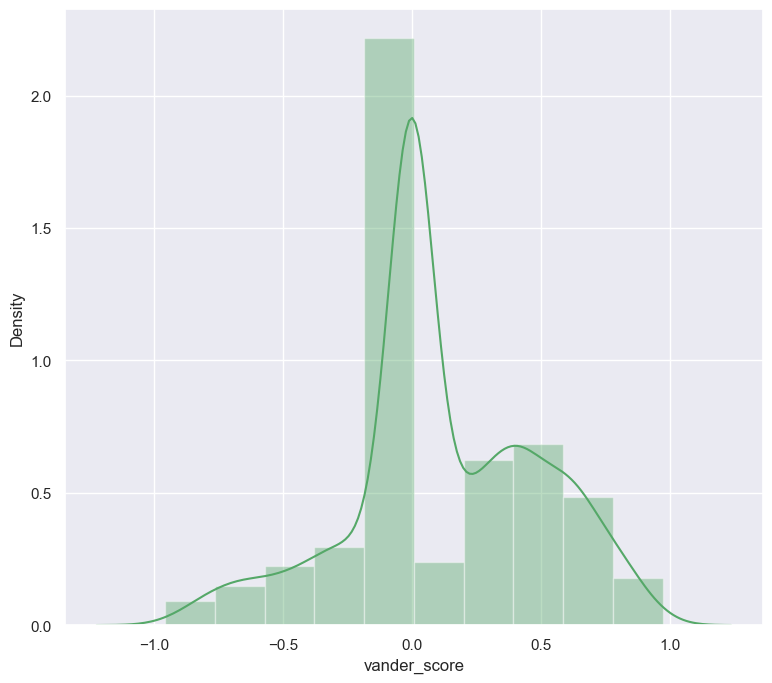



--------------


Sentiment score of Google Inc company


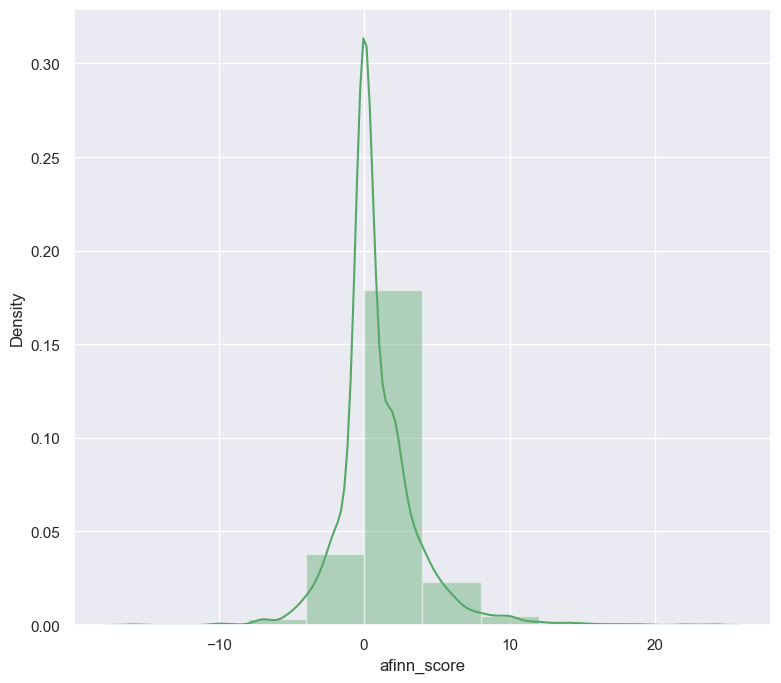

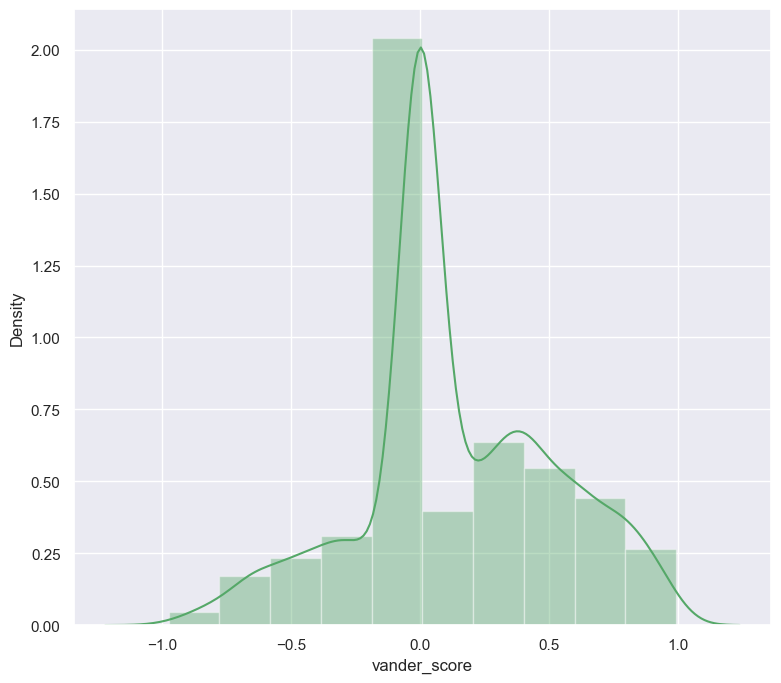



--------------


Sentiment score of Microsoft company


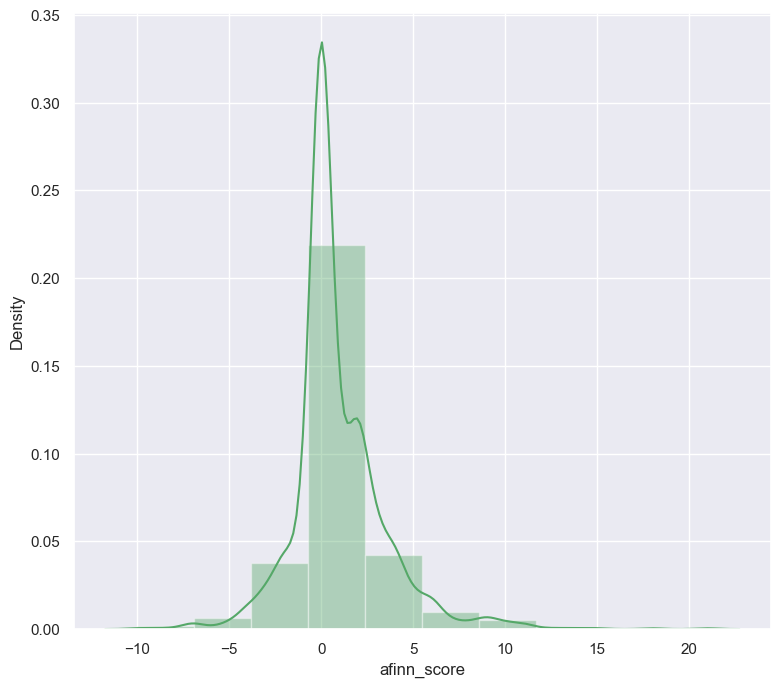

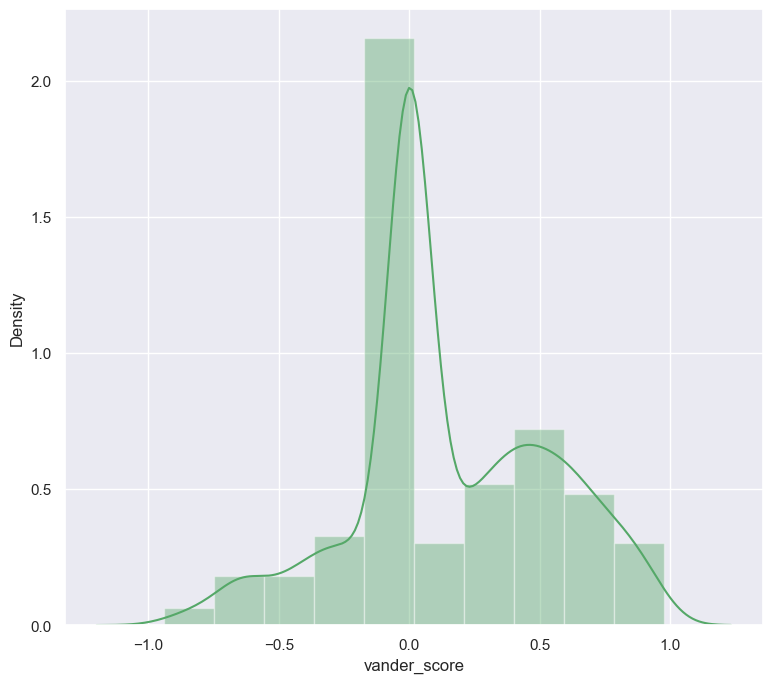



--------------


Sentiment score of Tesla Inc company


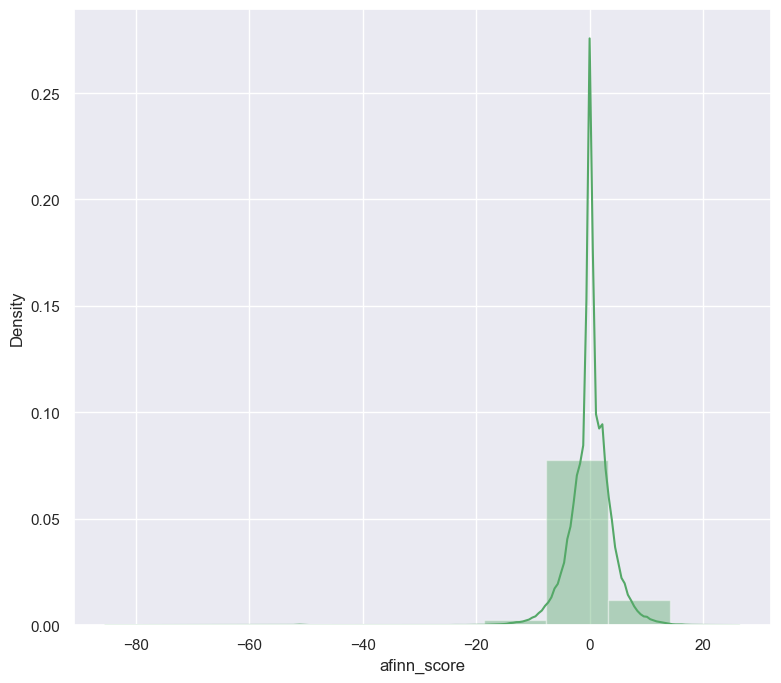

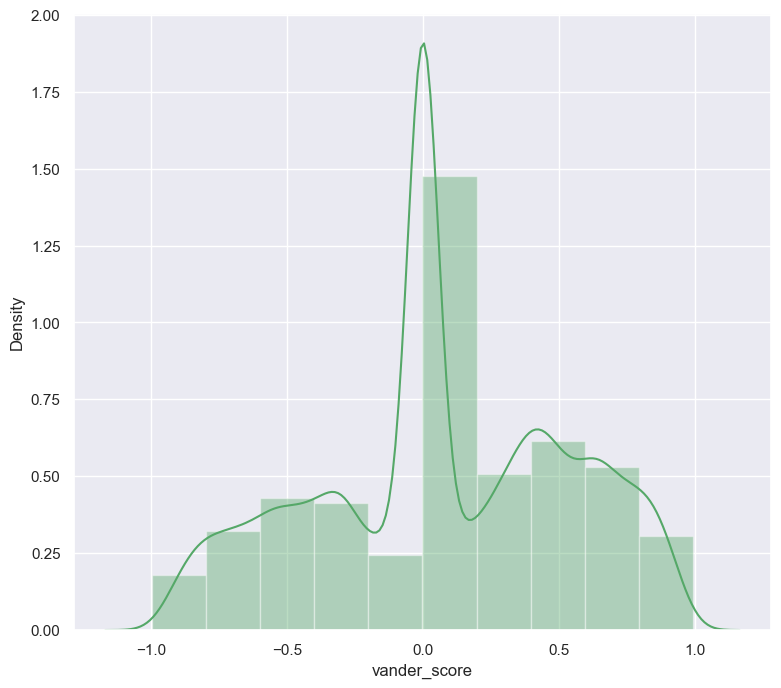



--------------




In [53]:
import time

for ticker_symbol in tweet_df["ticker_symbol"].unique():
    
    company_name = company[company["ticker_symbol"] == ticker_symbol]["company_name"].iloc[0]
    print(f"Sentiment score of {company_name} company")
    sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
    
    column_distplot(sub_tweet_df, column_name="afinn_score", bins=10, describe=False)
    plt.savefig(f'{company_name}_Afinn.png')
    column_distplot(sub_tweet_df, column_name="vander_score", bins=10, describe=False)
    plt.savefig(f'{company_name}_vader.png')
    plt.show()
    
    print("\n\n--------------\n\n")


In [54]:
def sentiment_overtime(tweet_df, stock_df, title, score_column_name="score"):
    print("\n\n")
    fig = plt.figure(figsize=(24,10))
    ax1 = fig.add_subplot()
    ax2 = ax1.twinx()
    
#     ax1.plot(tweet_df['day_date'], tweet_df[score_column_name], label='Tweets Sentiment')
    ax1.vlines(tweet_df['day_date'], 0, tweet_df[score_column_name]) 
    ax1.axhline(y=0, color='r', linestyle='-')

    
    ax2.plot(stock_df['day_date'], stock_df['close_value'], color='orange', label='Stock price')
    ax2.set_title("Effects of " + title +" tweets to stock price")
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    
    ax1.set_xlabel('Day date')
    ax1.set_ylabel('Sentiment Afinn score', color="blue")
    
    ax2.legend(lines + lines2, labels + labels2, loc=2)
    
#     center_y = max(stock_df['close_value']) - min(stock_df['close_value']) / 2
#     print(center_y)
    plt.show()   

In [55]:
ticker_symbols =  tweet_df["ticker_symbol"].unique()

In [56]:
def draw_stock_price_with_sentiment(tweet_df, stock_df, start_day, end_day, score_name="score"):
    for ticker_symbol in ticker_symbols:
        print(f"Ticker symbol: {ticker_symbol}")
        
        sub_company = company[company["ticker_symbol"] == ticker_symbol]["company_name"]
        if len(sub_company) != 1:
            continue

        company_name = sub_company.iloc[0]
    #     print(company_name)

        print(f"Stock price of {company_name} company with ticker symbol is {ticker_symbol}")
        
        sub_tweet_df = tweet_df[tweet_df["ticker_symbol"] == ticker_symbol]
        sub_tweet_df = sub_tweet_df[(sub_tweet_df["day_date"]>=pd.to_datetime(start_day)) & (sub_tweet_df["day_date"]<=pd.to_datetime(end_day))]
        
    #     print(sub_tweet_df[:5])
        sub_stock_df = stock_df[stock_df["ticker_symbol"] == ticker_symbol]
        sub_stock_df = sub_stock_df[(sub_stock_df["day_date"]>=pd.to_datetime(start_day)) & (sub_stock_df["day_date"]<=pd.to_datetime(end_day))]
    #     print(sub_stock_df[:5])
    
        sentiment_overtime(sub_tweet_df, sub_stock_df, company_name, score_column_name=score_name)

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





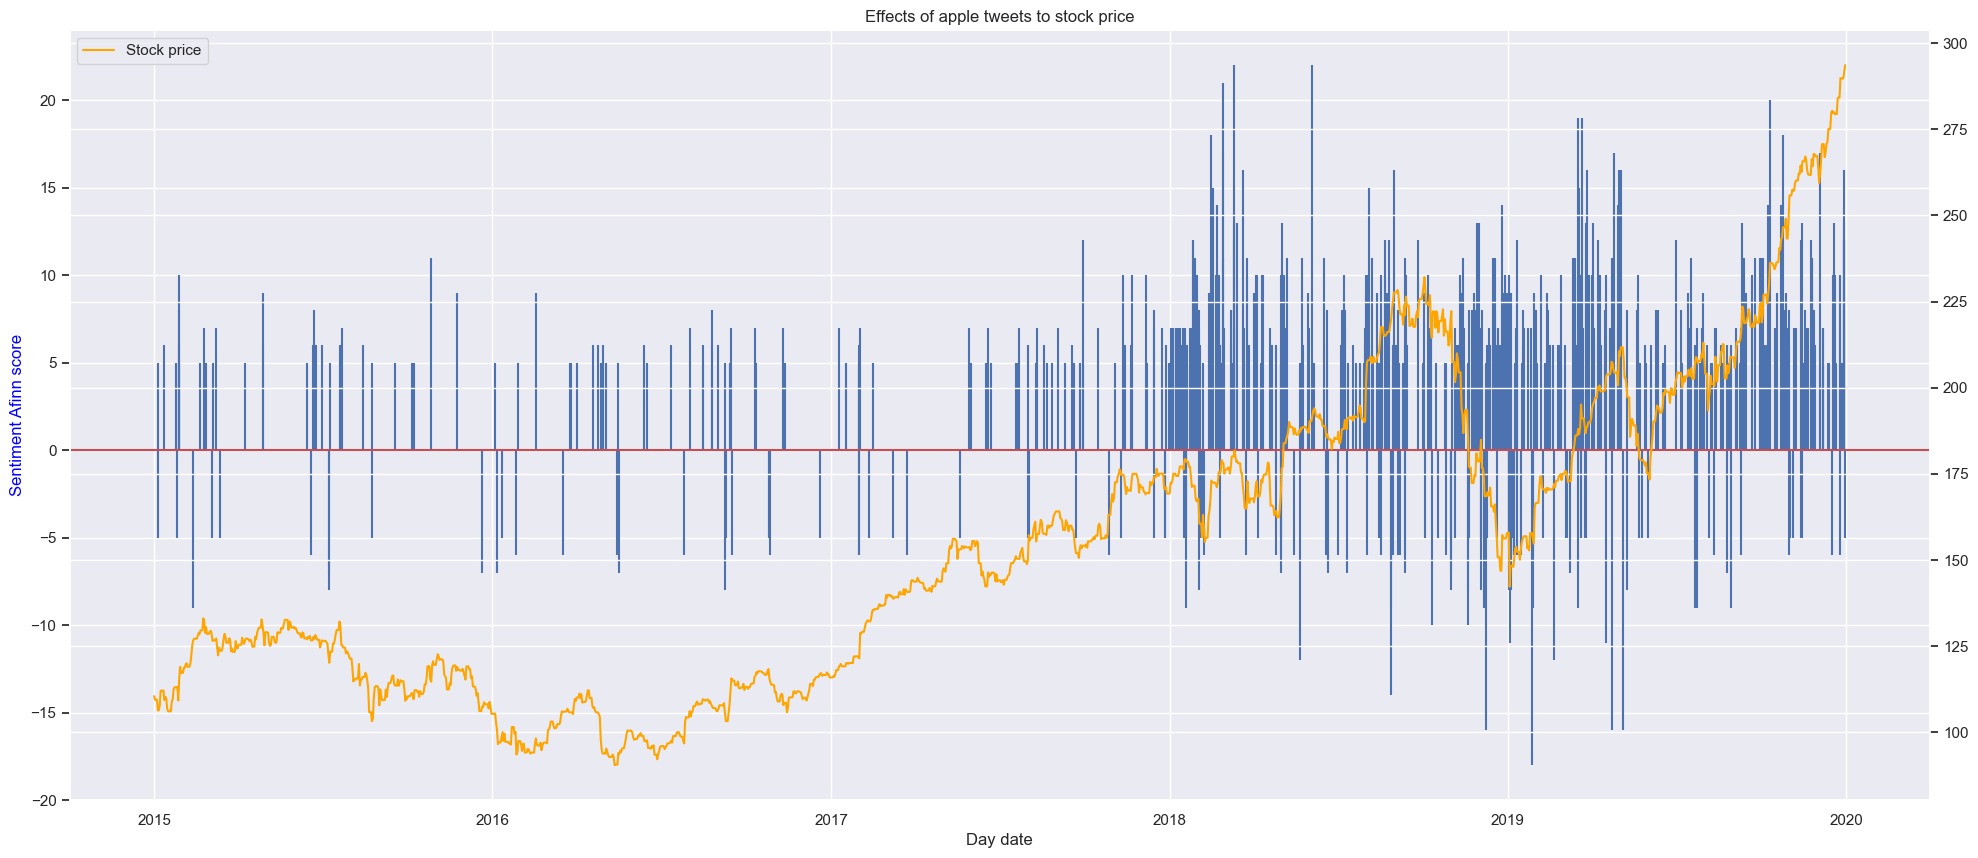

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





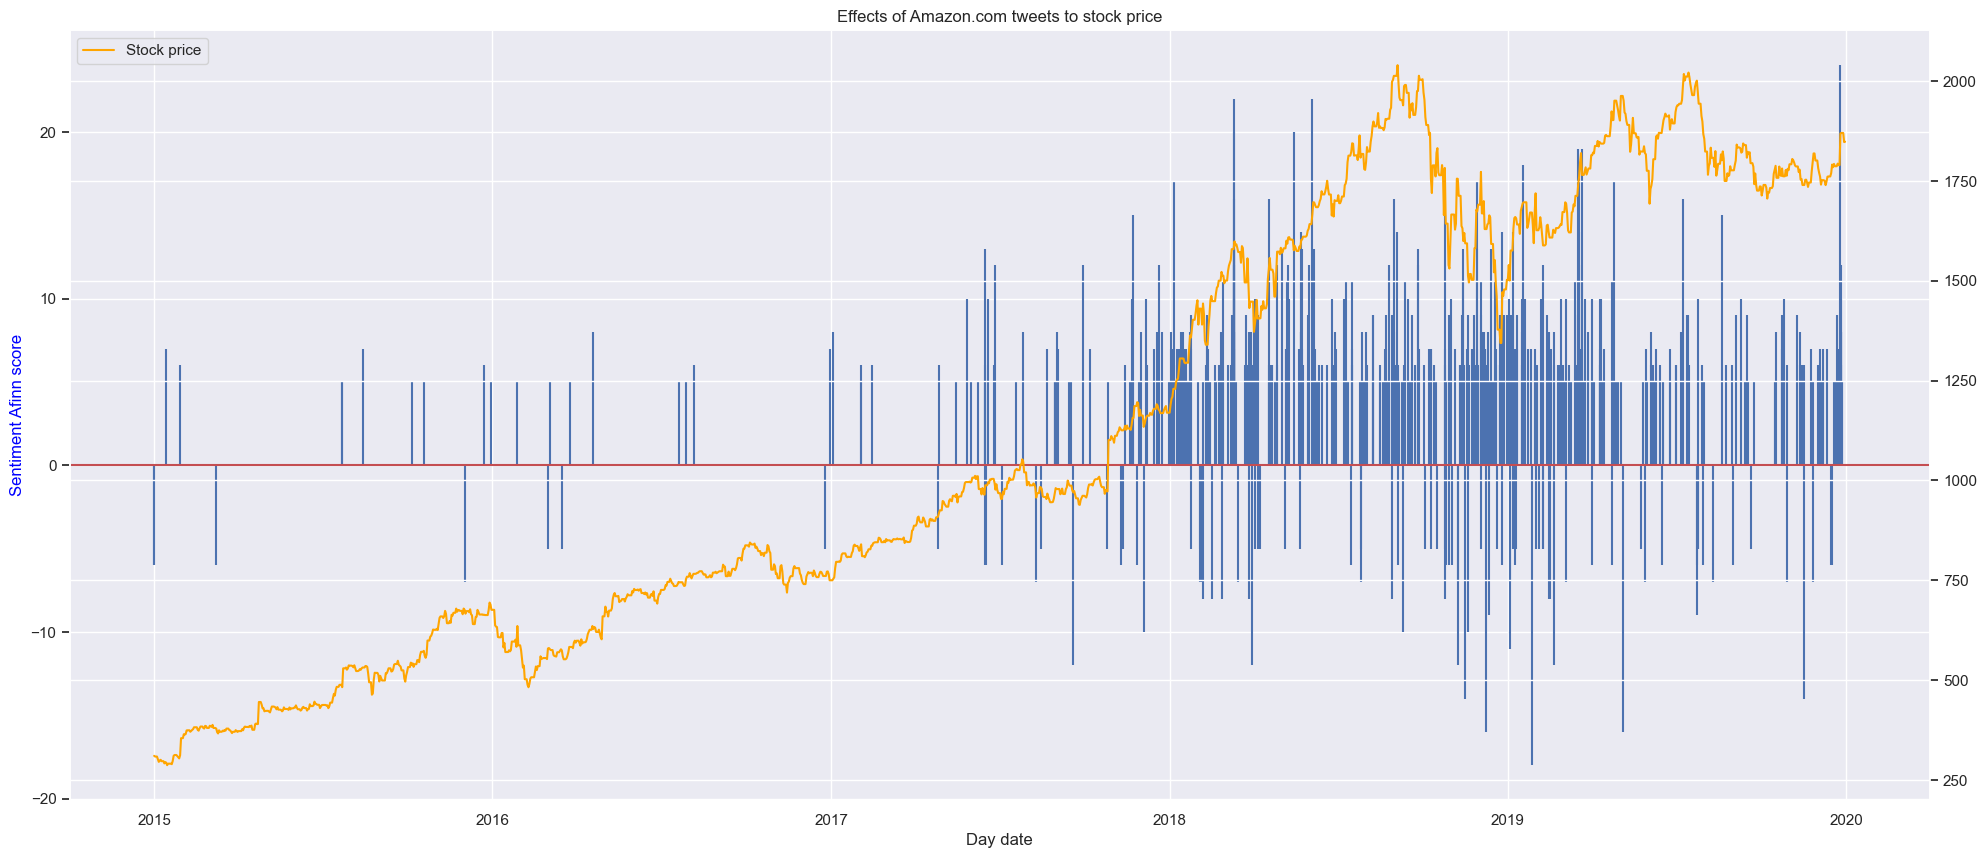

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





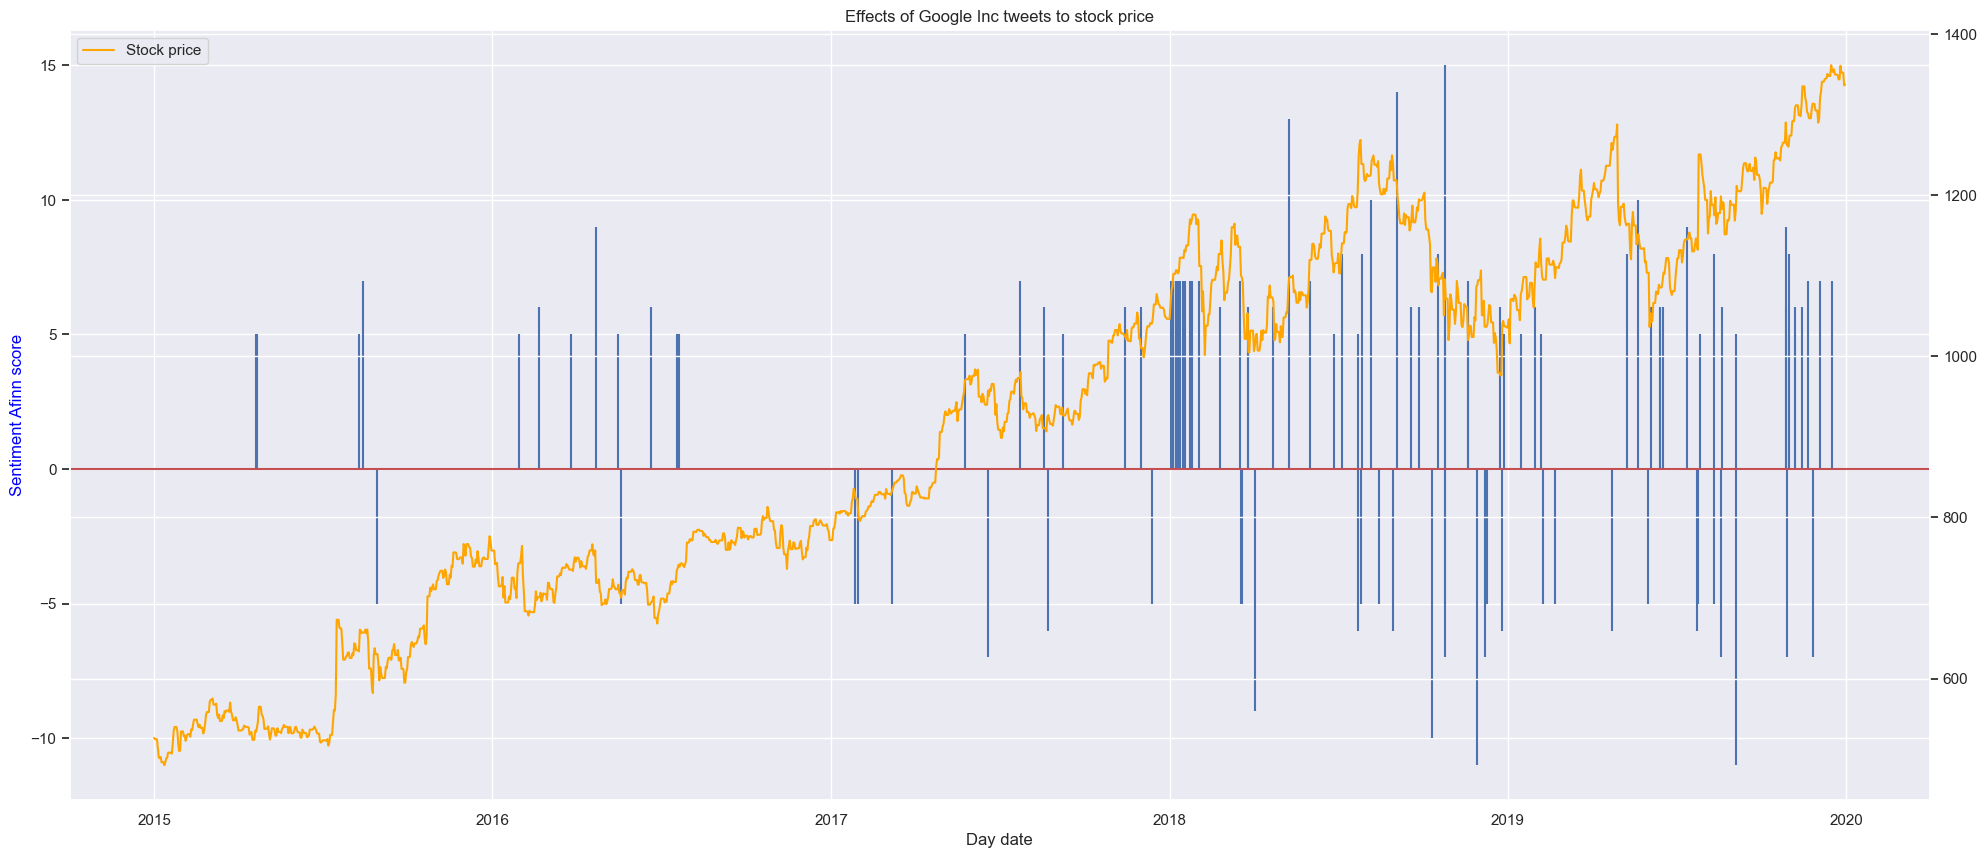

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





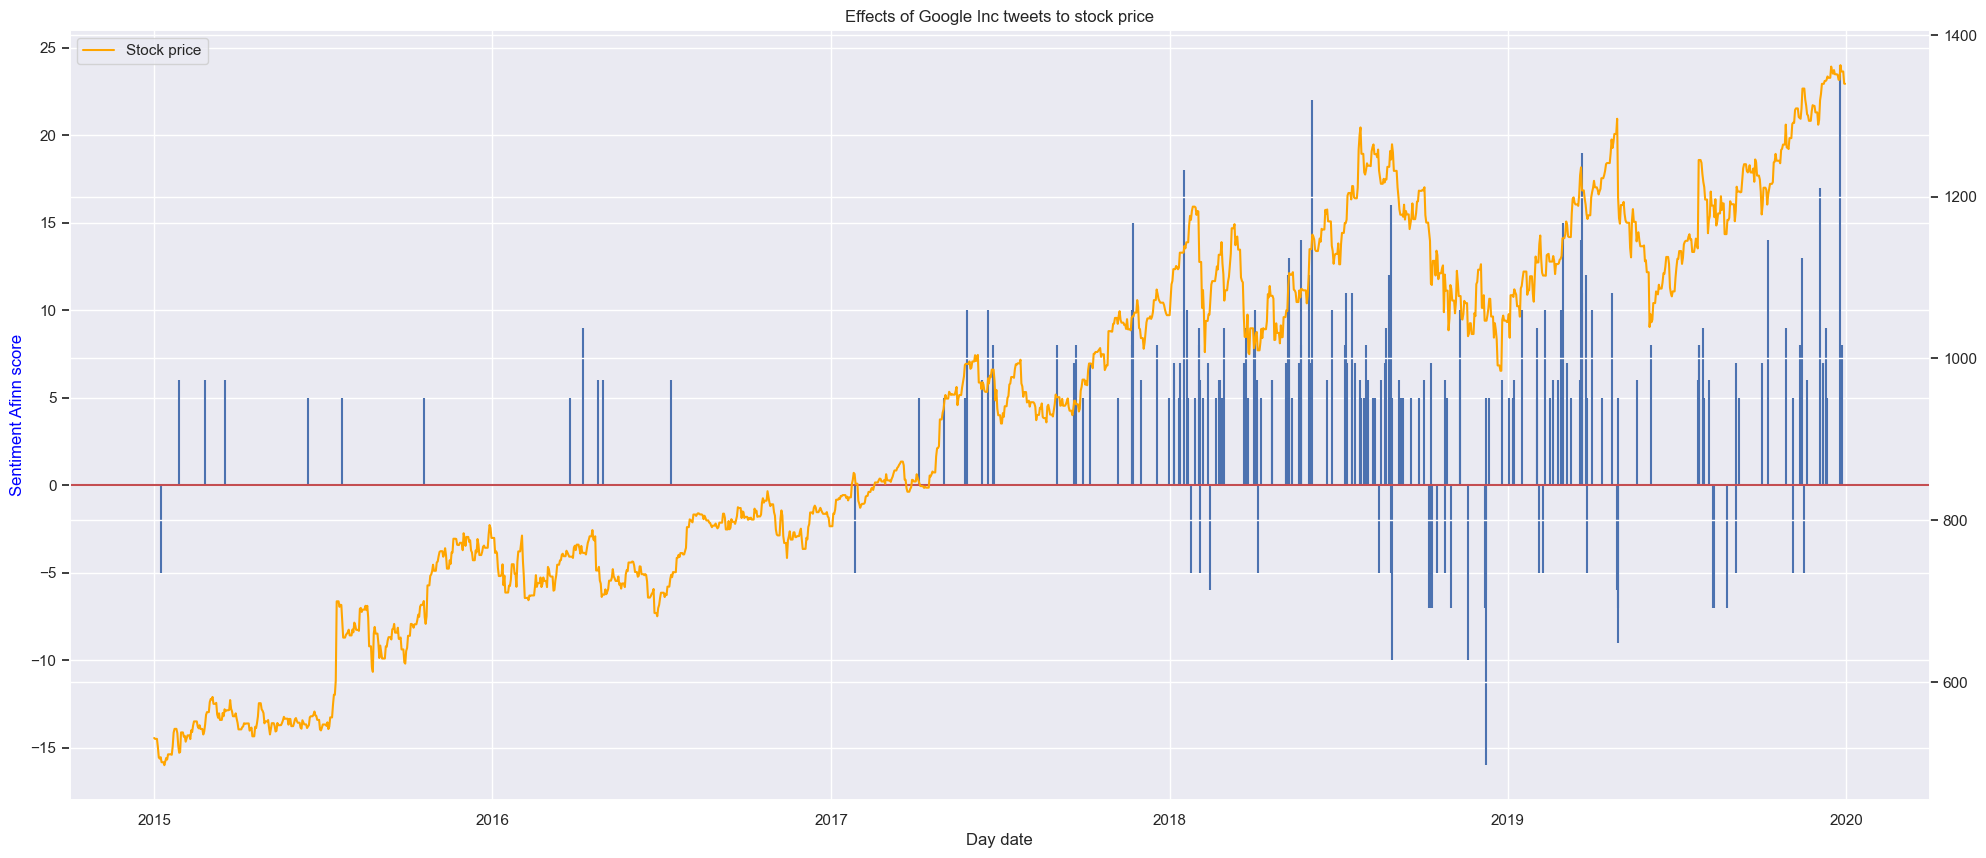

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





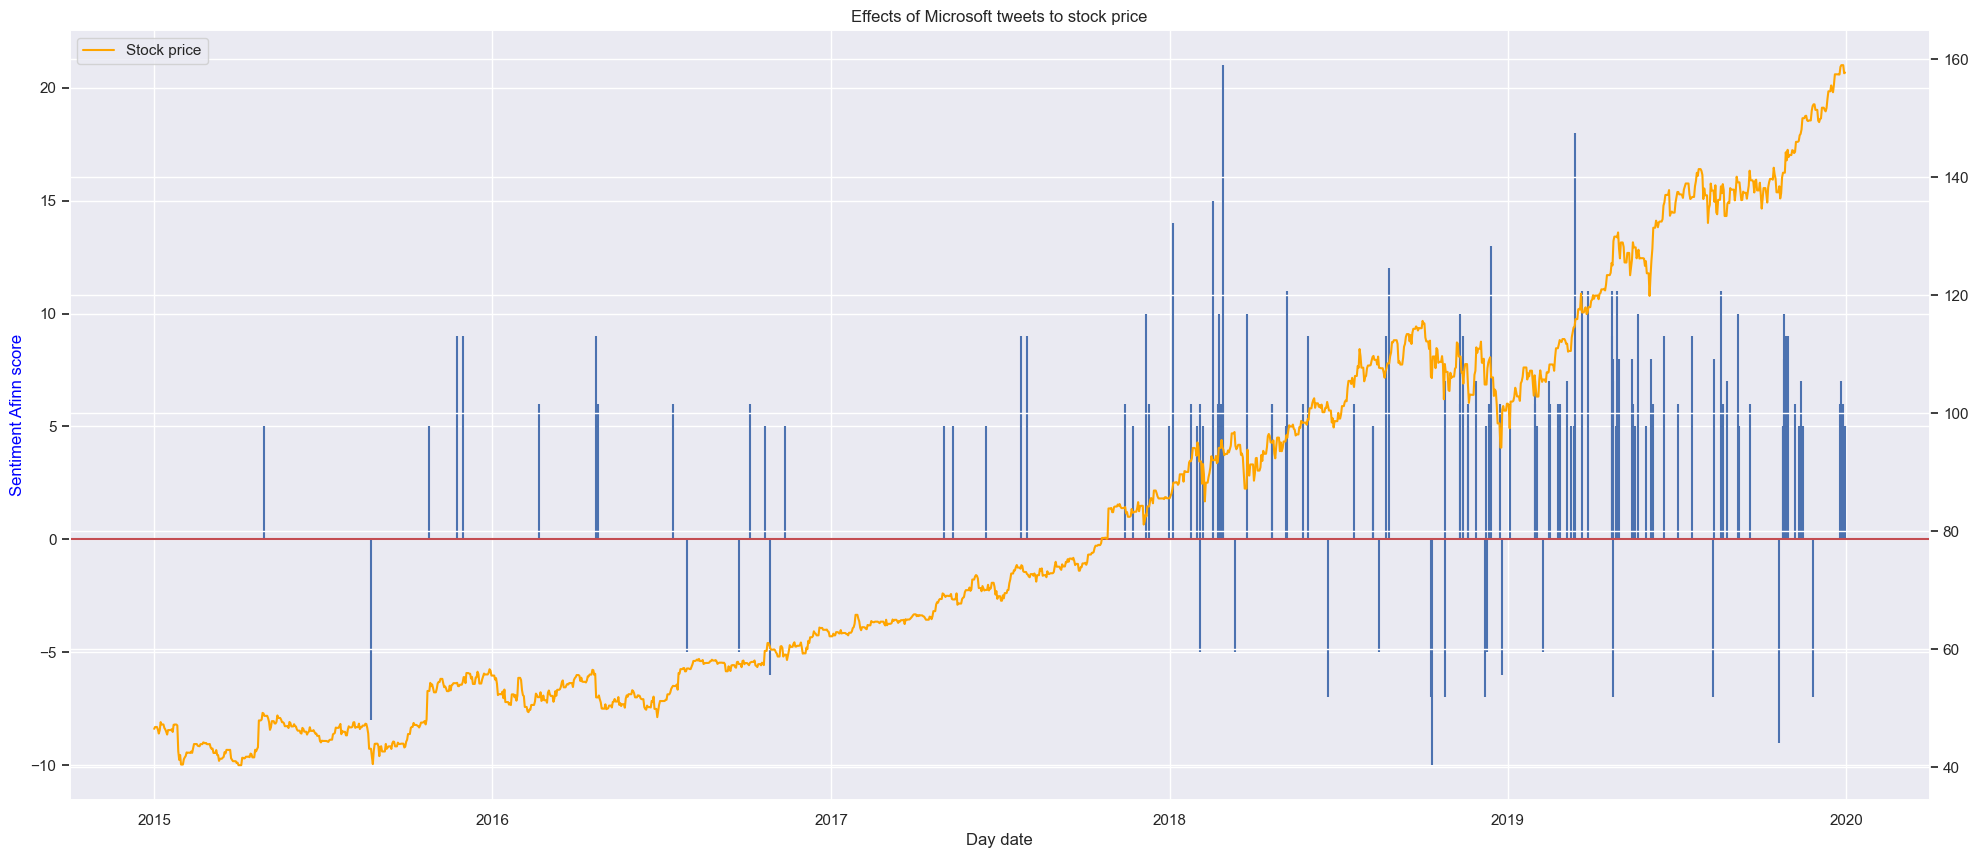

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





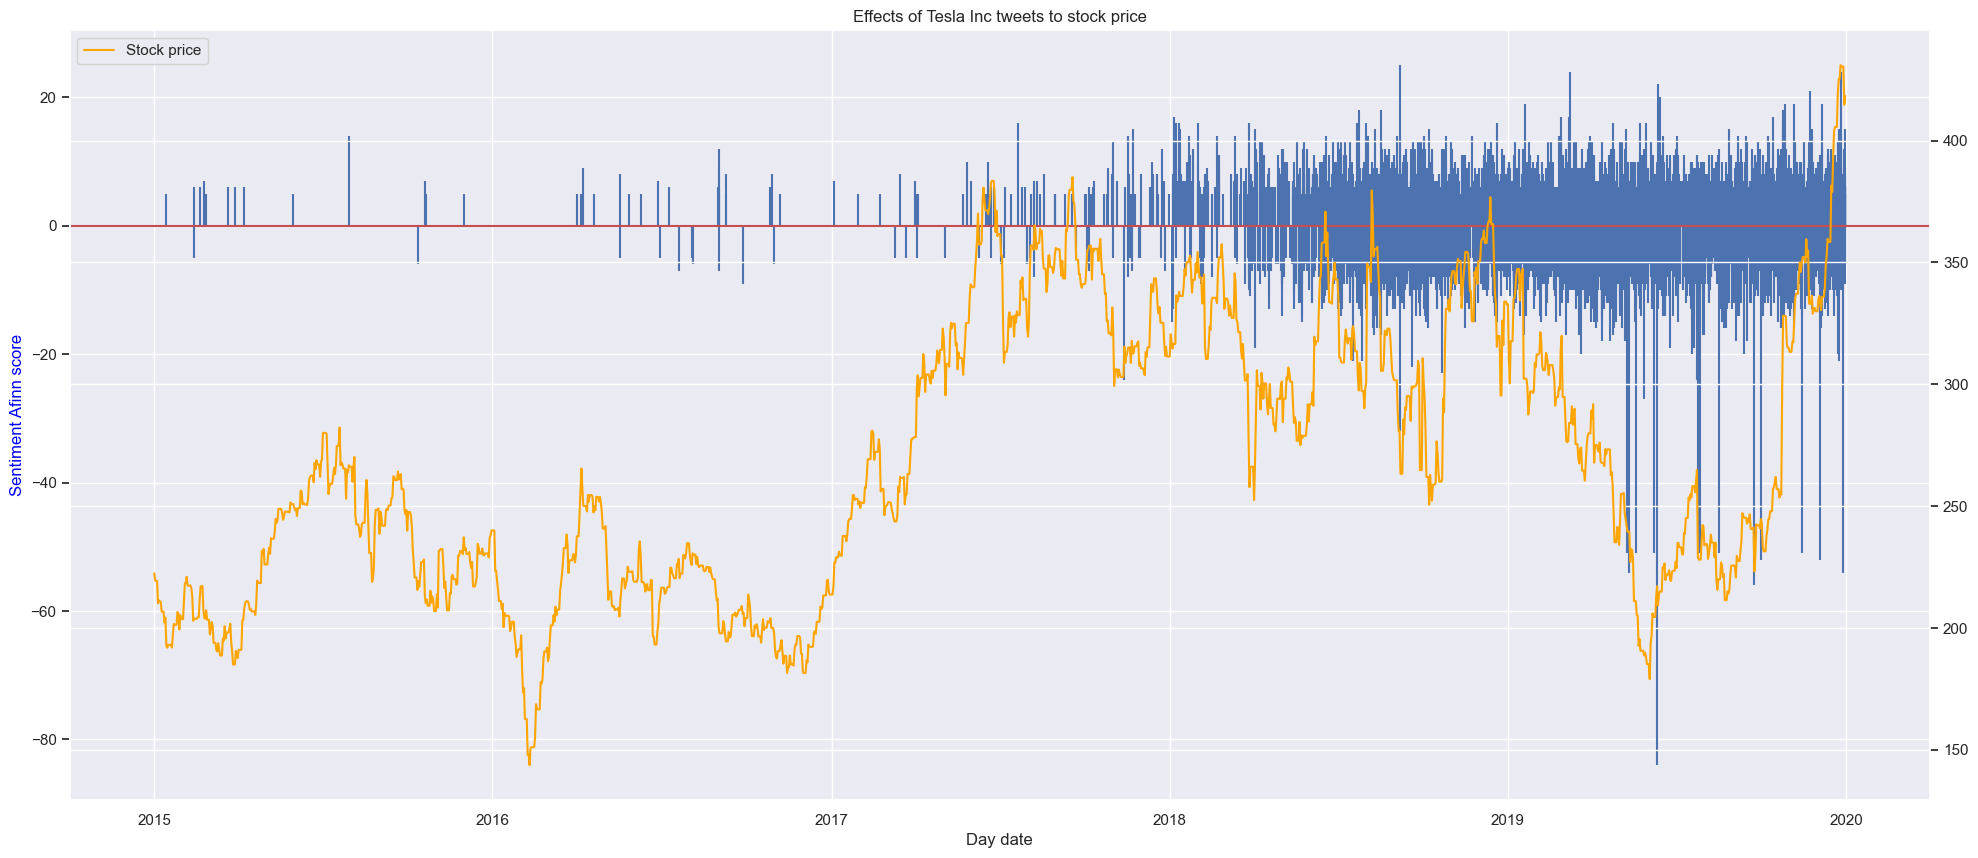

In [57]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
# tmp_tweet_df = tweet_df


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df,start_day= min(stock_df['day_date']), end_day= max(stock_df['day_date']), score_name="afinn_score")

In [58]:
start_day = "2019-6-1"
end_day = "2020-1-1"

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





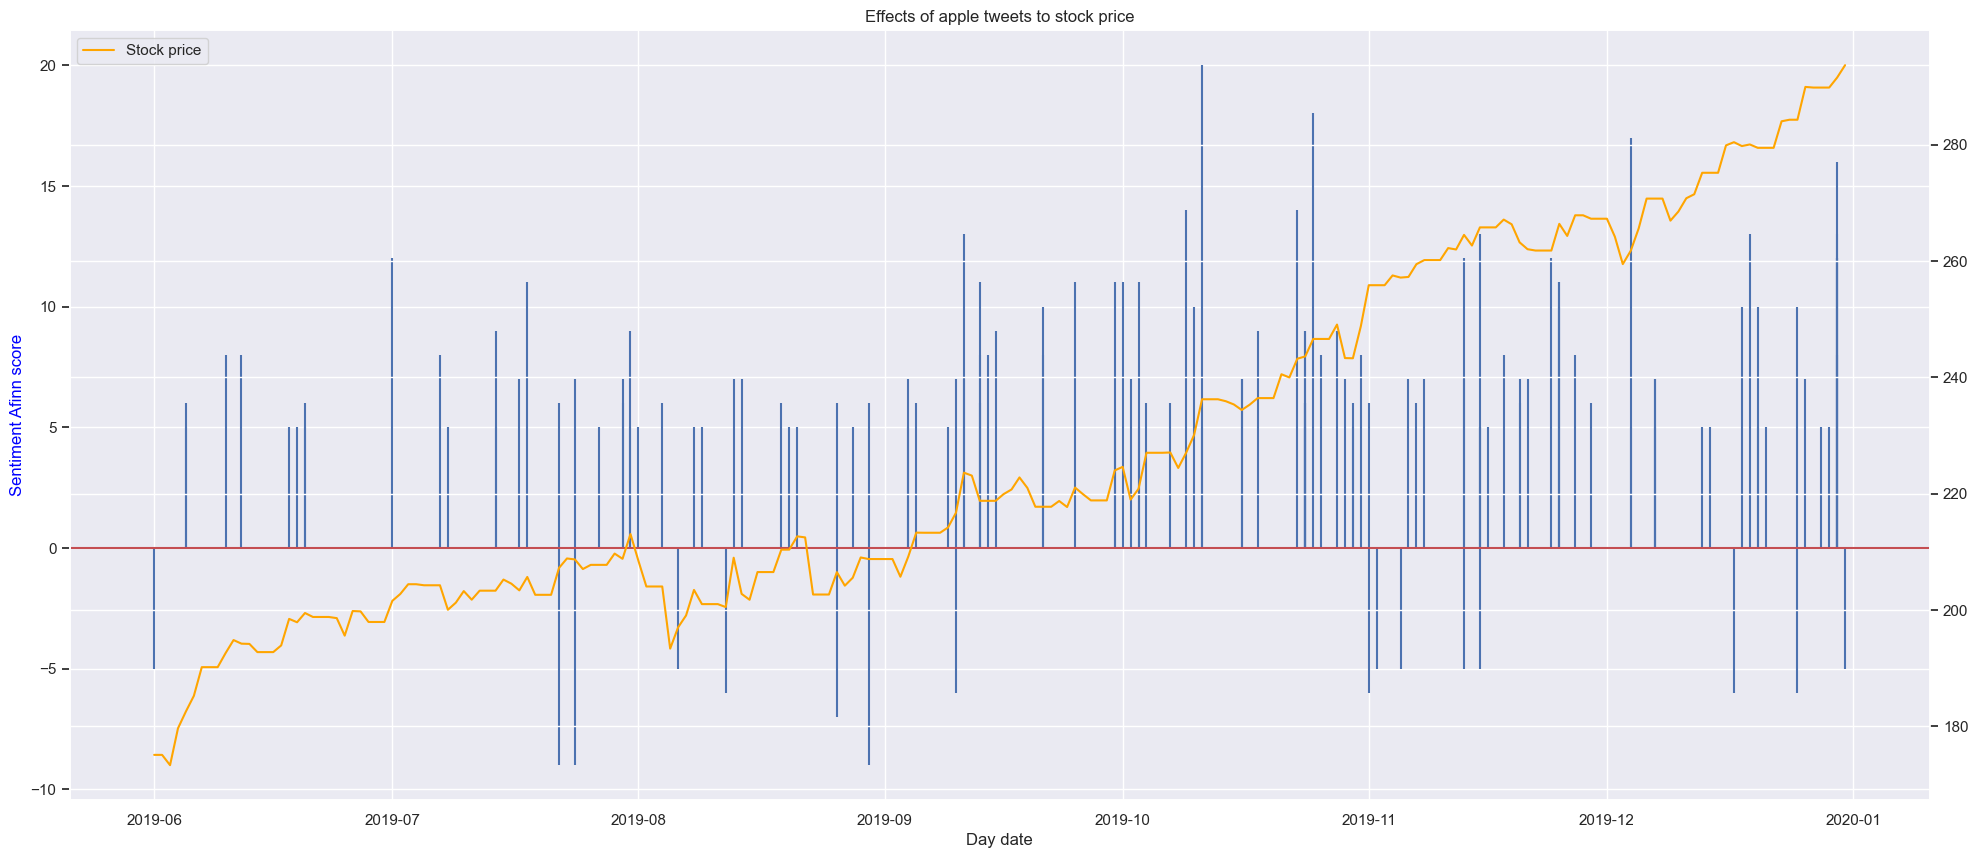

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





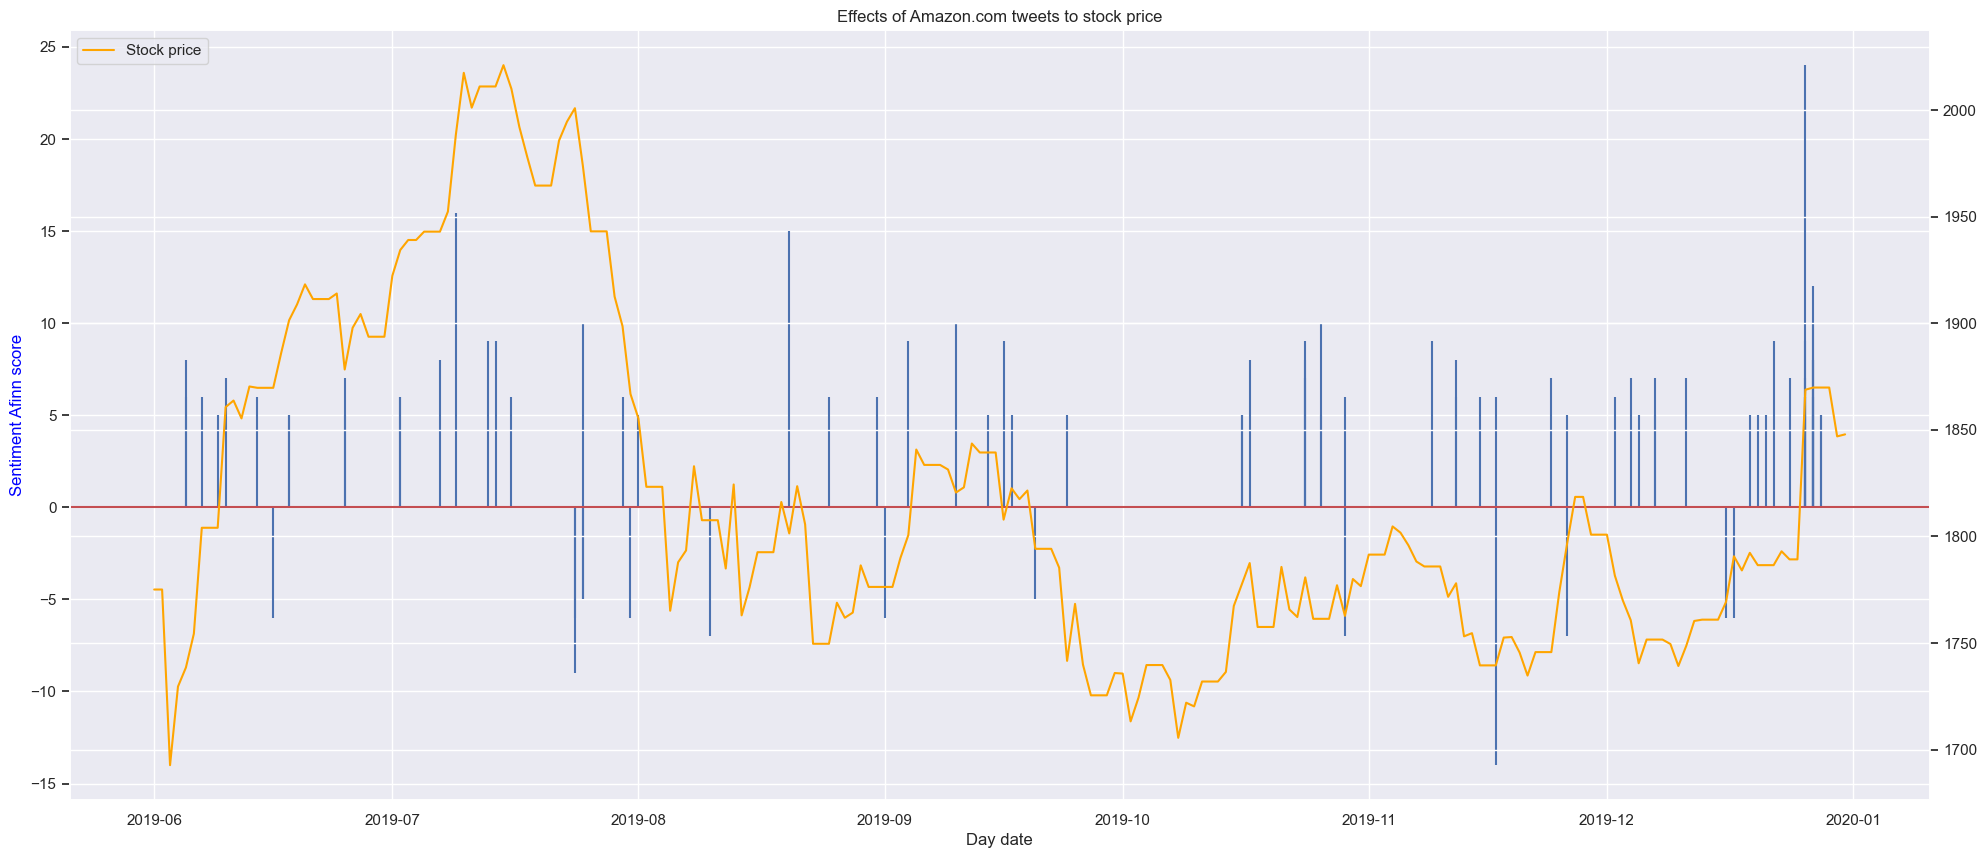

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





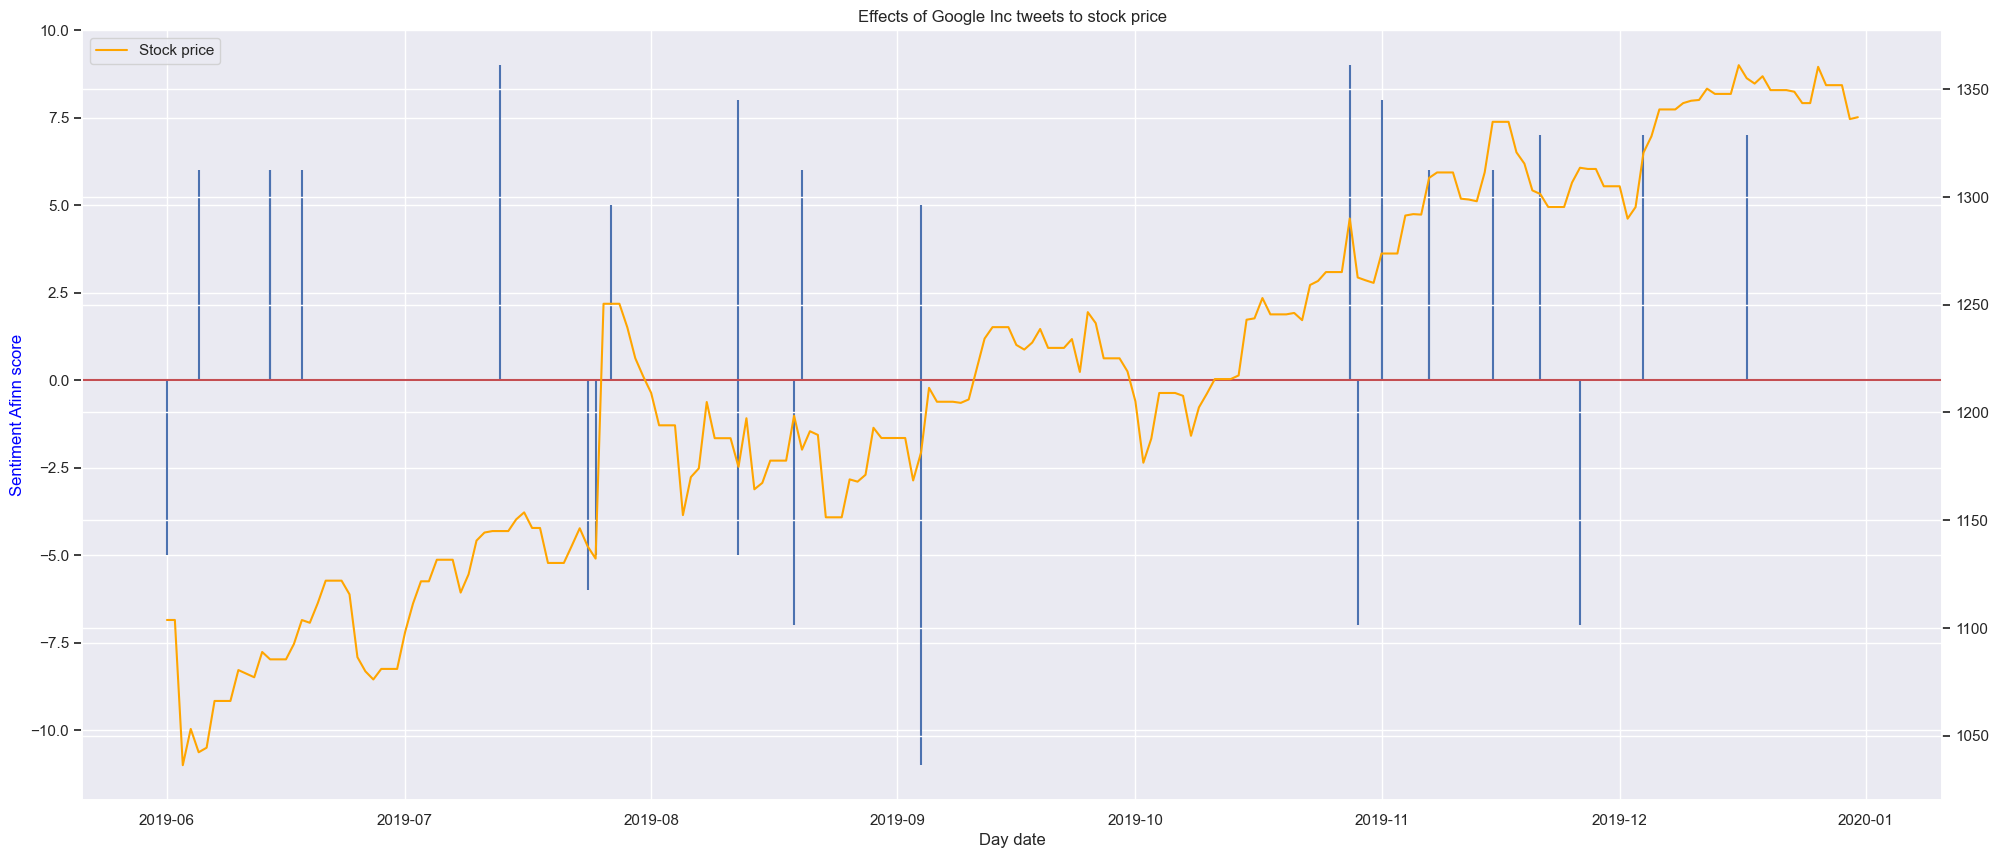

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





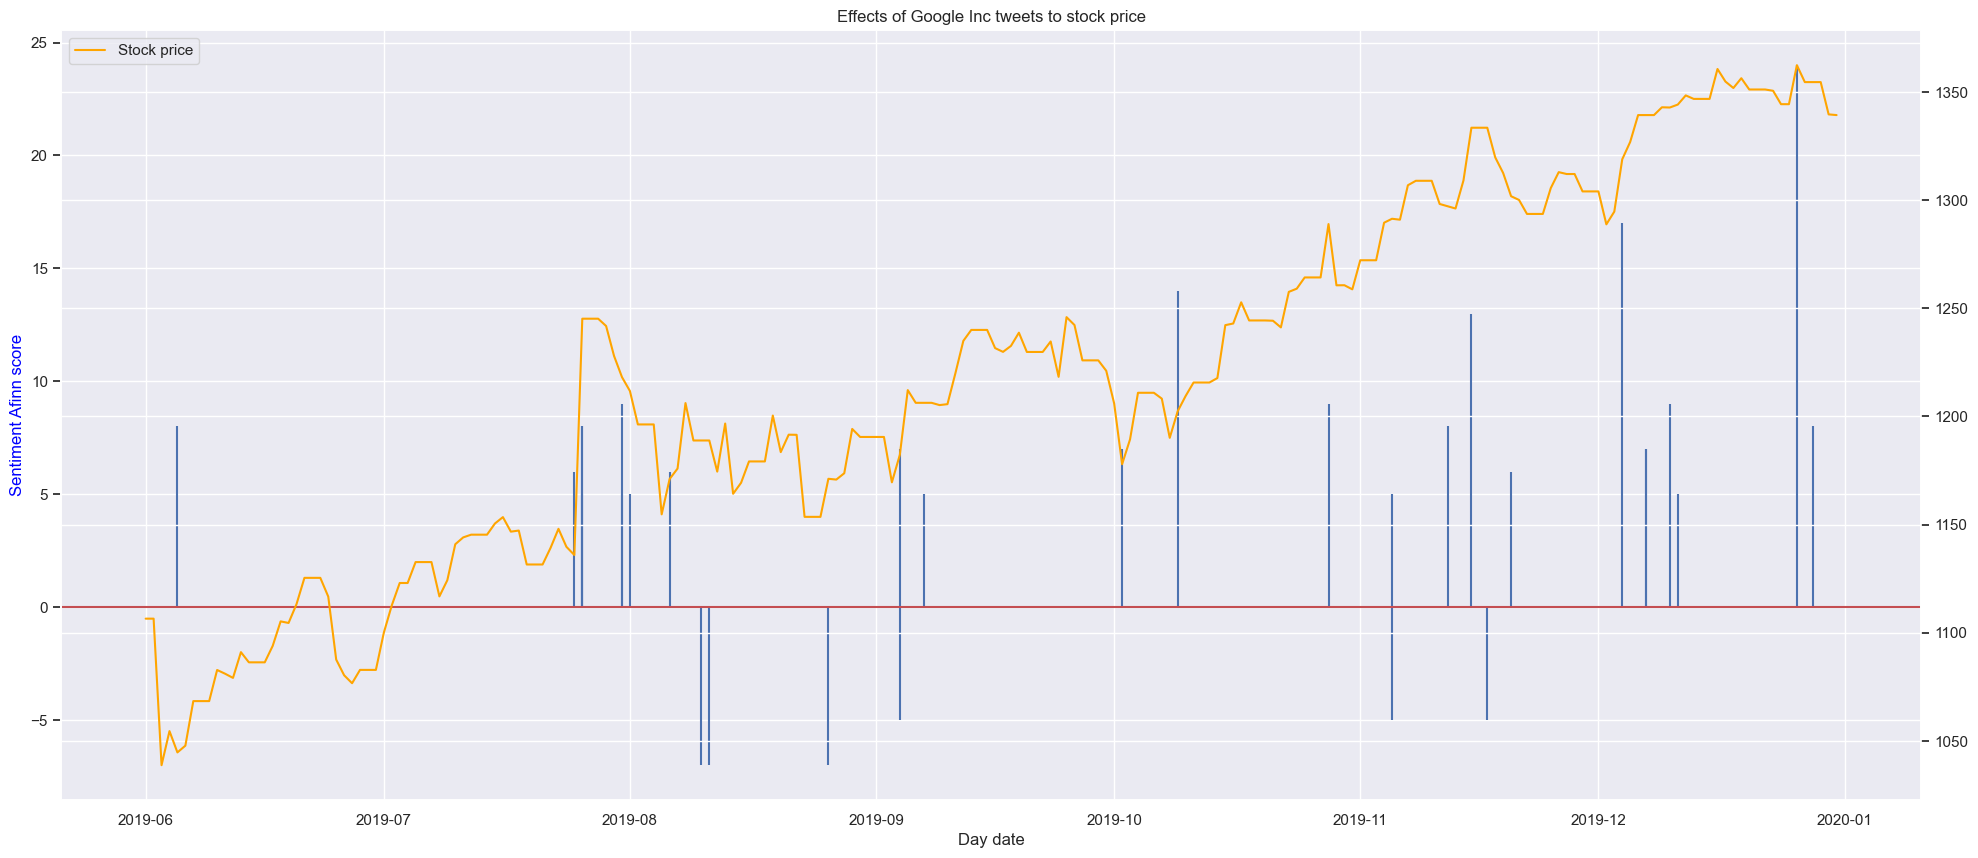

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





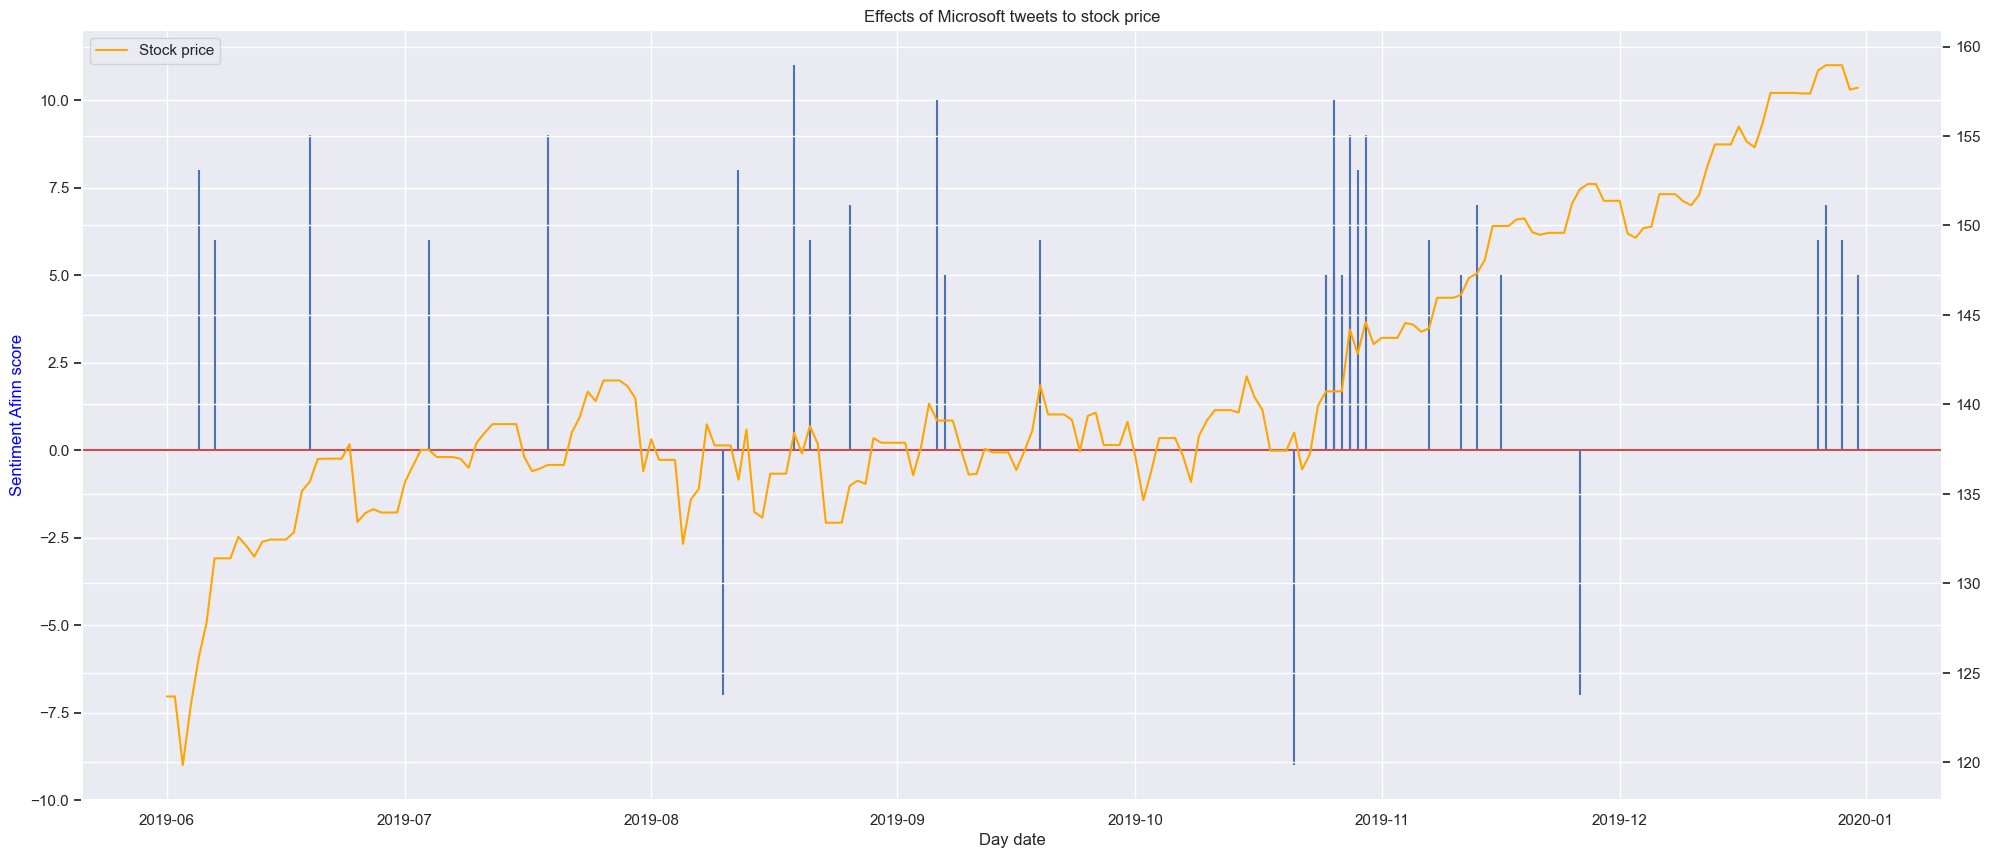

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





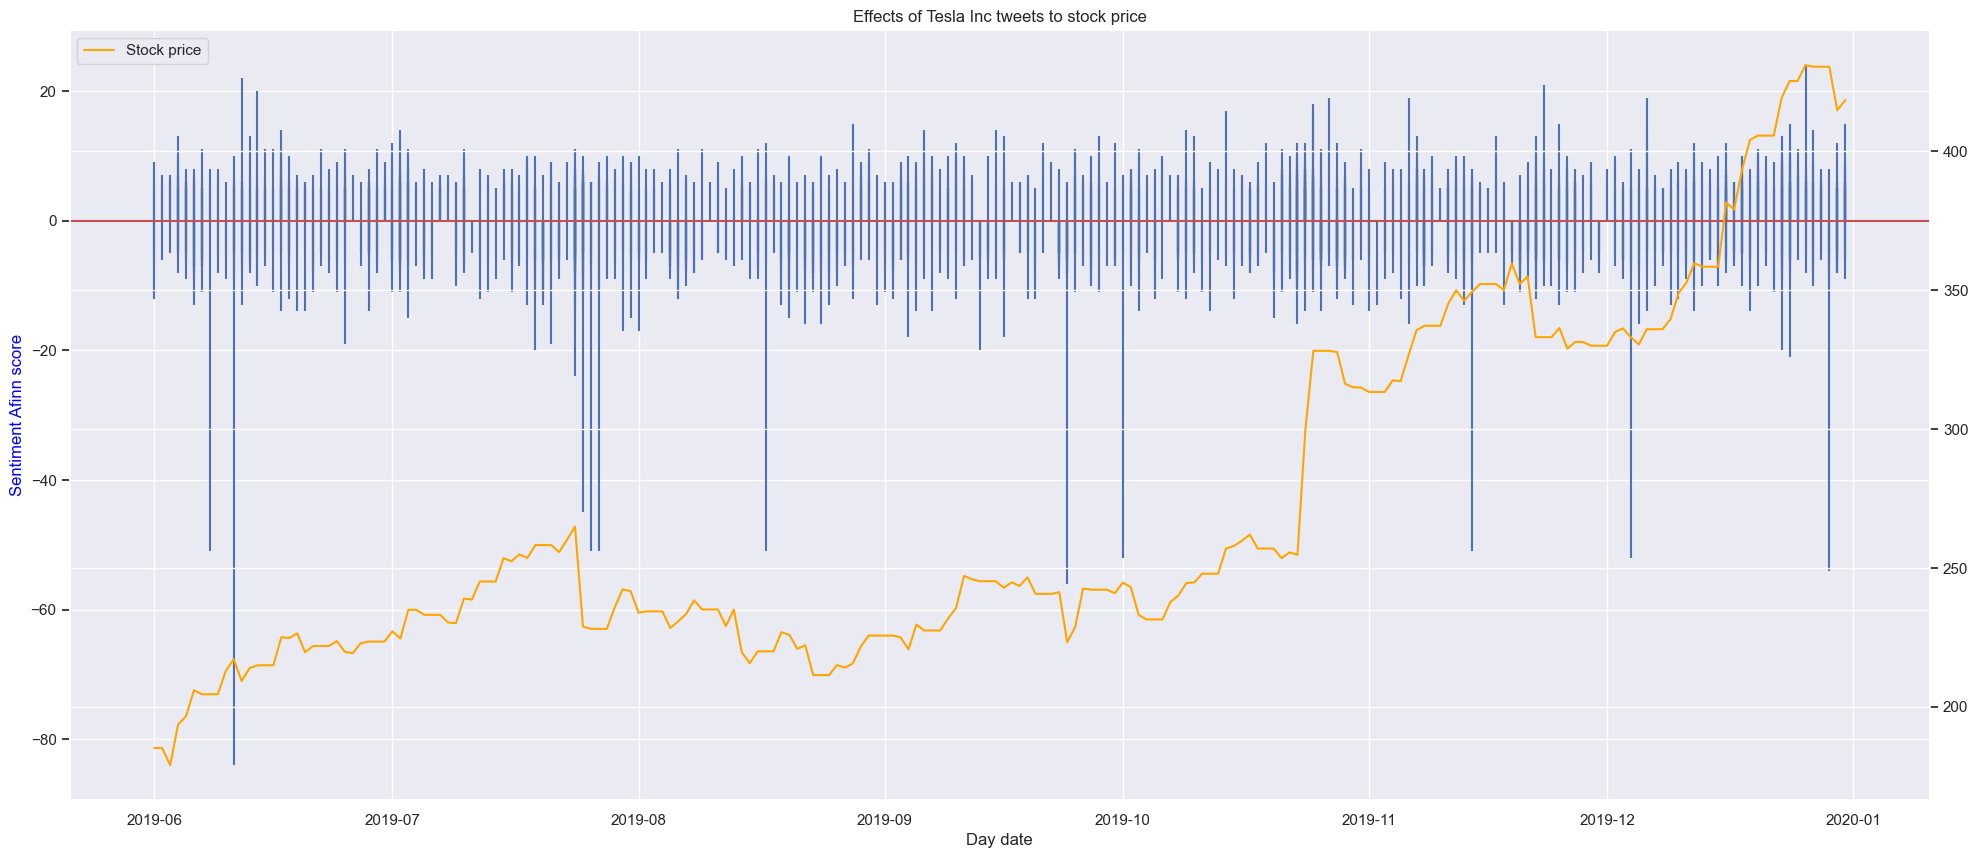

In [59]:
score_threshold = 5
tmp_tweet_df = tweet_df[(tweet_df['afinn_score']<=-score_threshold) | (tweet_df['afinn_score']>=score_threshold)]
draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day,end_day, score_name="afinn_score")

Ticker symbol: AAPL
Stock price of apple company with ticker symbol is AAPL





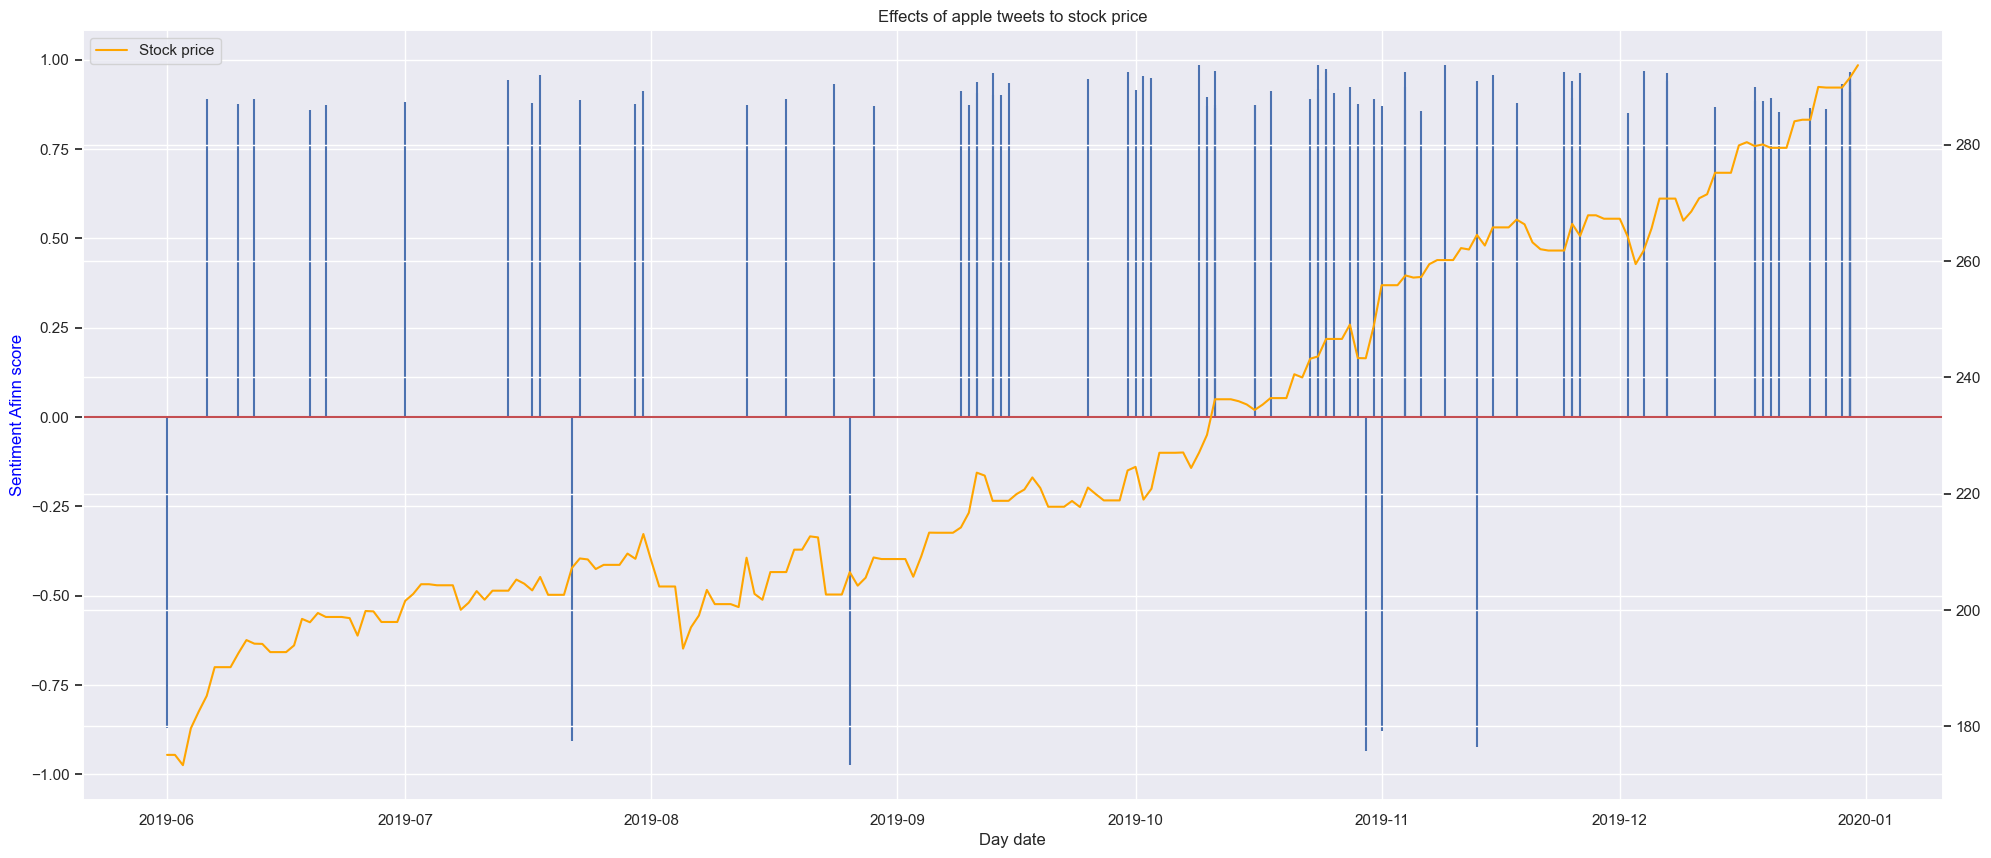

Ticker symbol: AMZN
Stock price of Amazon.com company with ticker symbol is AMZN





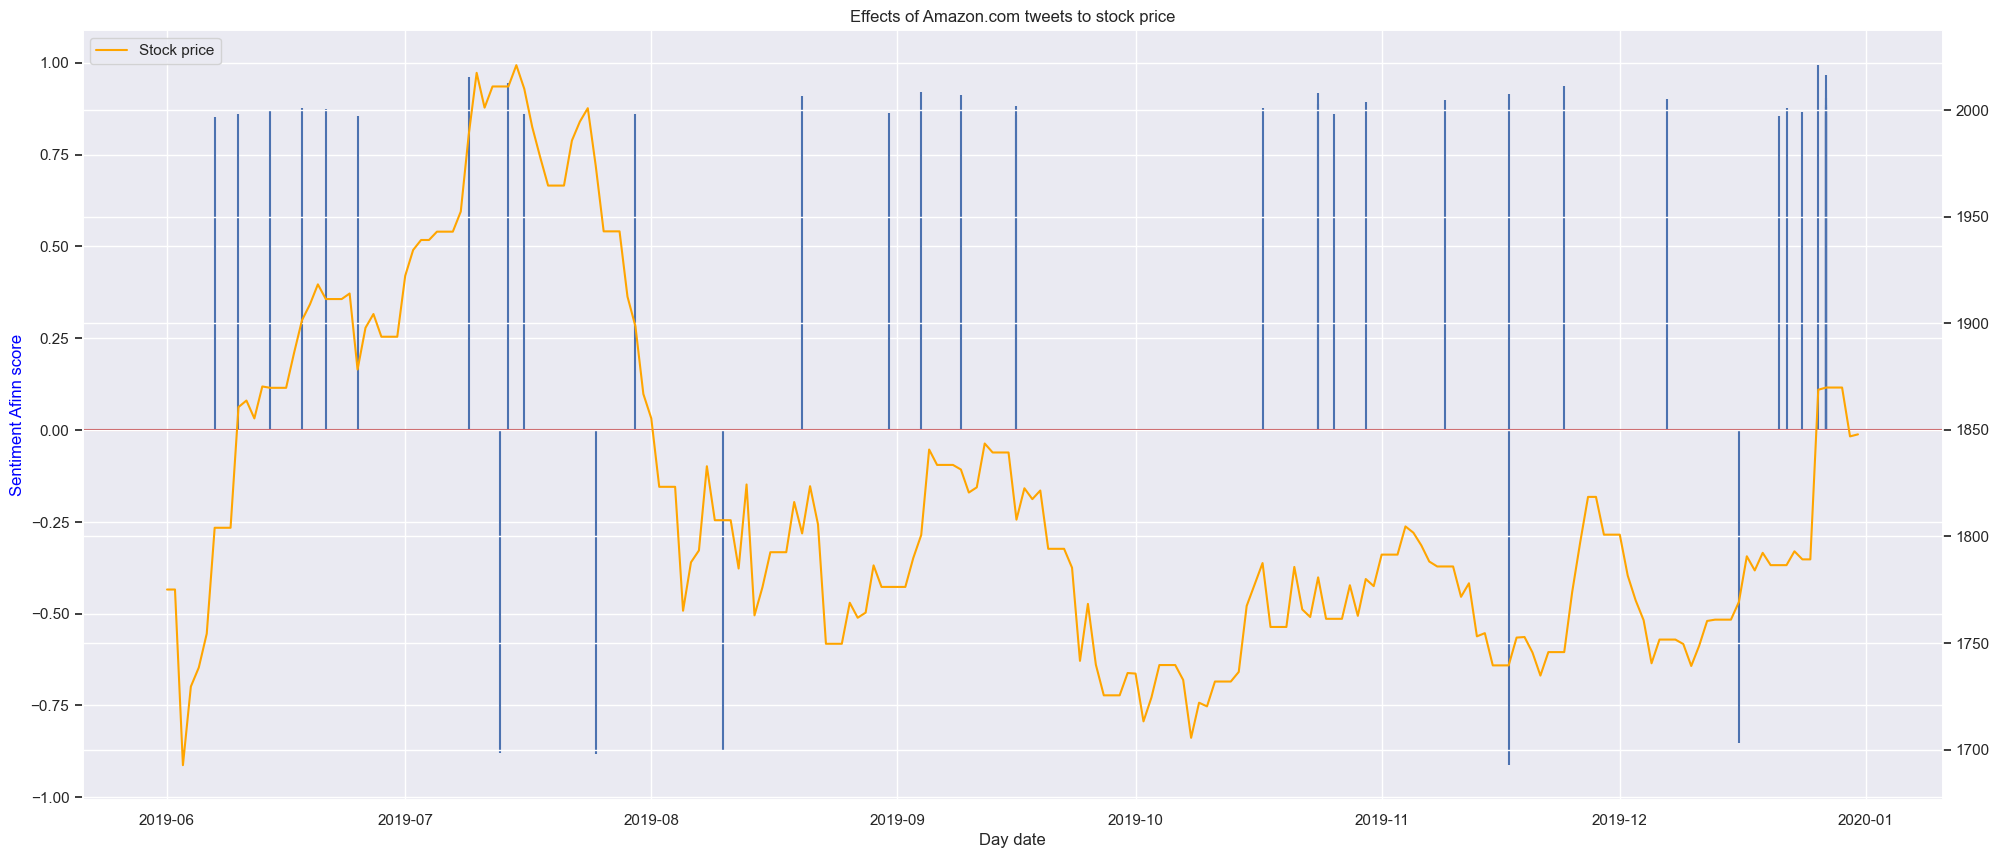

Ticker symbol: GOOG
Stock price of Google Inc company with ticker symbol is GOOG





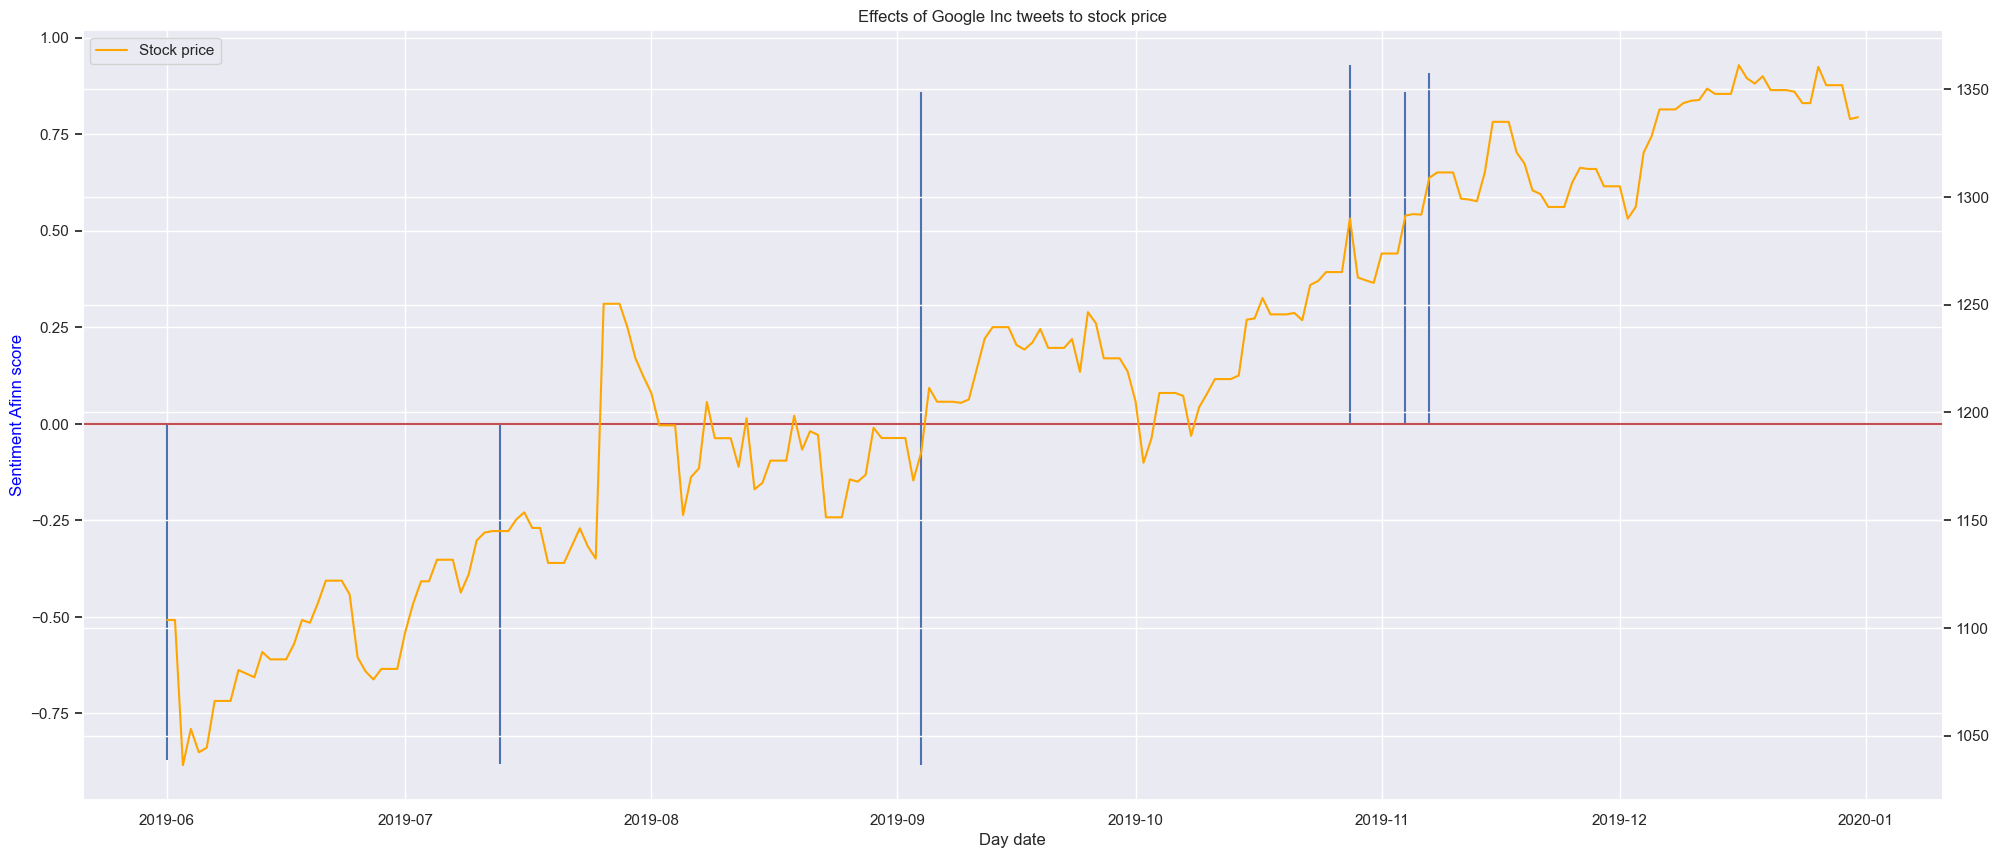

Ticker symbol: GOOGL
Stock price of Google Inc company with ticker symbol is GOOGL





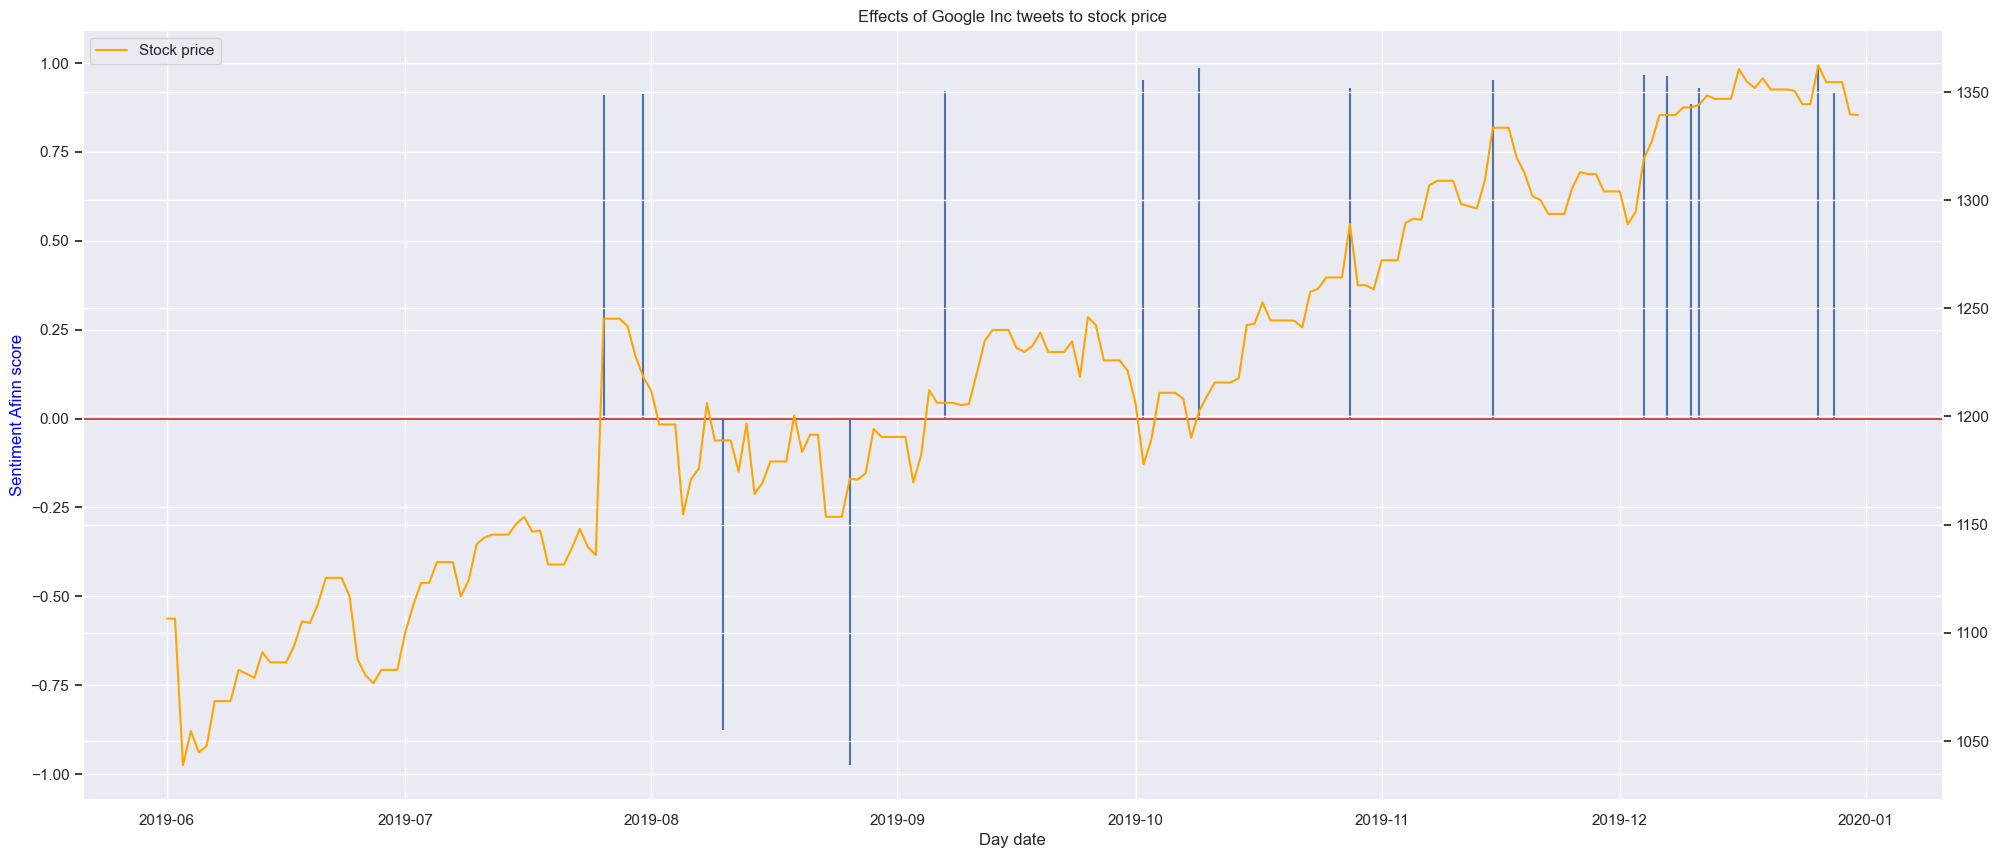

Ticker symbol: MSFT
Stock price of Microsoft company with ticker symbol is MSFT





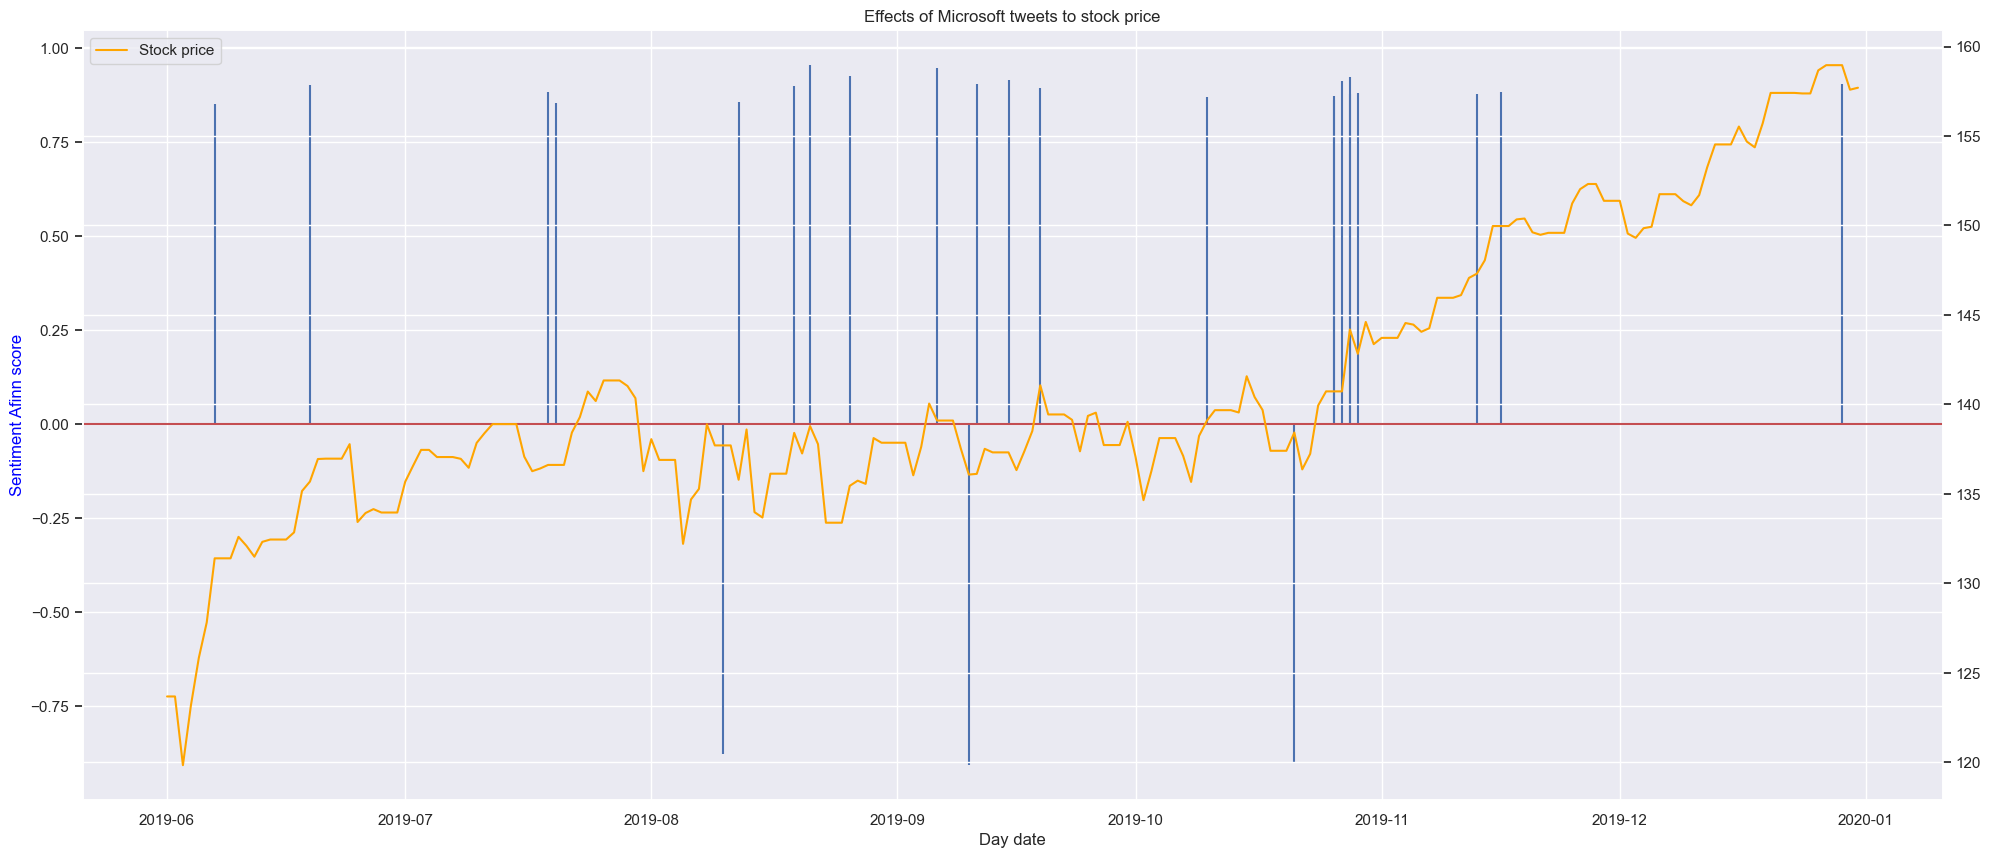

Ticker symbol: TSLA
Stock price of Tesla Inc company with ticker symbol is TSLA





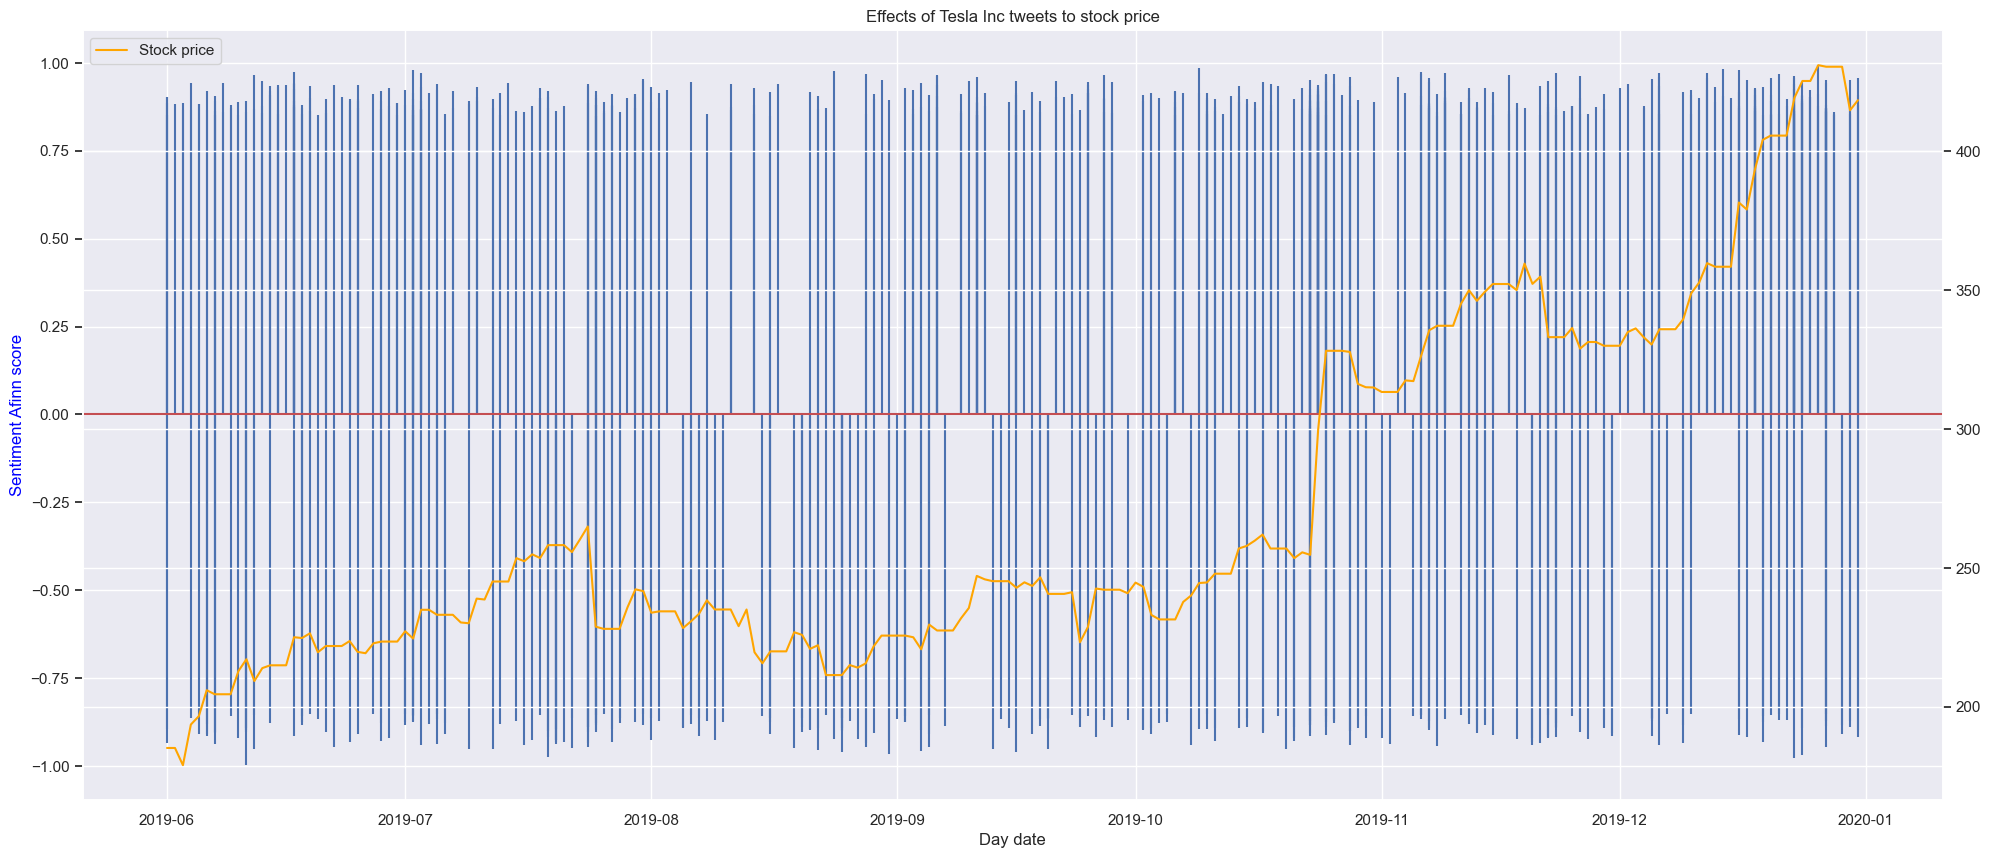

In [60]:
score_threshold = 0.85
tmp_tweet_df = tweet_df[(tweet_df['vander_score']<=-score_threshold) | (tweet_df['vander_score']>=score_threshold)]


draw_stock_price_with_sentiment(tmp_tweet_df, stock_df, start_day, end_day, score_name="vander_score")

HTML Call

In [61]:
webbrowser.open_new_tab('LatestHoverindex.html')

True